# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.

- Check for missing values and report the number and percentage of missing data for each column.

- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

- Generate bar plots for at least three categorical columns and discuss the frequency distributions.

- Identify outliers in at least one numerical column using boxplots.

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age  workclass  fnlwgt     education  education-num  \
28127   28  Local-gov  207213    Assoc-acdm             12   
23336   71          ?  176986       HS-grad              9   
3245    48    Private  235646  Some-college             10   
19433   59          ?  367984     Bachelors             13   
17161   19    Private  271446  Some-college             10   
26604   24    Private  322674    Assoc-acdm             12   
6925    45    Private  327886   Prof-school             15   
13288   28    Private   76129       HS-grad              9   
20217   32  State-gov  169583     Doctorate             16   
20713   55  State-gov  199713     Bachelors             13   

           marital-status         occupation   relationship   race     sex  \
28127       Never-married       Craft-repair      Own-child  White    Male   
23336             Widowed                  ?      Unmarried  White    Male   
3245   Married-civ-spouse              Sales        Husband  White    Male   
19433  Married-civ-spouse                  ?        Husband  White    Male   
17161       Never-married      Other-service      Own-child  White  Female   
26604       Never-married  Handlers-cleaners  Not-in-family  White    Male   
6925        Never-married     Prof-specialty  Not-in-family  White    Male   
13288       Never-married  Machine-op-inspct      Unmarried  White  Female   
20217       Never-married     Prof-specialty  Not-in-family  White  Female   
20713  Married-civ-spouse     Prof-specialty        Husband  White    Male   

       capital-gain  capital-loss  hours-per-week native-country income  
28127             0             0               5  United-States  <=50K  
23336             0             0              24  United-States  <=50K  
3245           3103             0              40  United-States   >50K  
19433             0             0              40  United-States  <=50K  
17161             0             0              25  United-States  <=50K  
26604             0             0              48  United-States  <=50K  
6925              0             0              40  United-States   >50K  
13288             0             0              40      Guatemala  <=50K  
20217             0             0              70  United-States  <=50K  
20713             0             0              15  United-States  <=50K

In [30]:
data.shape

(32561, 15)

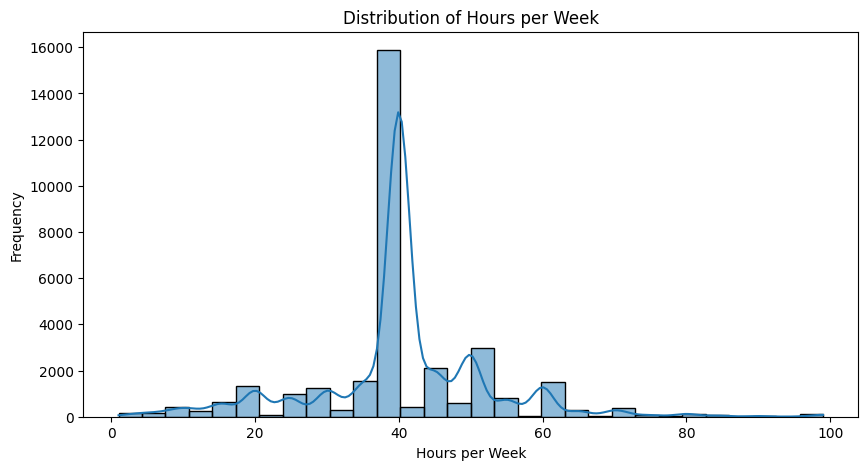

In [31]:
# 1. Analyze Target Variable (hours-per-week)
plt.figure(figsize=(10, 5))
sns.histplot(data['hours-per-week'], kde=True, bins=30)
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

- **General Shape & Distribution**: the plot shows a right-skewed (positively skewed) distribution, meaning most individuals work between 35 and 45 hours per week, with a sharp peak around 40 hours (an expected result, since average work-week is 40h long).
- **Frequency & Mode**:the highest bar around 40 hours indicates this is the mode (most frequent value).There’s a sharp drop in frequency on both sides of 40, suggesting that deviations from this standard are less common.
- **Outliers & Extreme Values**: outliers are visible on the right side (beyond 60 hours), extending up to almost 100 hours per week:
This suggests a small number of individuals work extremely long hours—possibly entrepreneurs, executives, or individuals with multiple jobs.
On the left side, we see some people working less than 20 hours, possibly representing part-time jobs or irregular work - an extra argument for eliminating the individuals with more than 80h/week in the first part of the project.
- **Skewness**: the longer tail on the right indicates positive skewness: this means while most people work a typical 40-hour week, there are fewer people working very high hours, pulling the tail to the right.
- **Secondary Peaks**: small peaks around 50 and 60 hours might indicate:specific industries or occupations with common extended workweeks.

In [32]:
# 2. Descriptive Statistics
print(data.describe().round(2))

            age      fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.00    32561.00       32561.00      32561.00      32561.00   
mean      38.58   189778.37          10.08       1077.65         87.30   
std       13.64   105549.98           2.57       7385.29        402.96   
min       17.00    12285.00           1.00          0.00          0.00   
25%       28.00   117827.00           9.00          0.00          0.00   
50%       37.00   178356.00          10.00          0.00          0.00   
75%       48.00   237051.00          12.00          0.00          0.00   
max       90.00  1484705.00          16.00      99999.00       4356.00   

       hours-per-week  
count        32561.00  
mean            40.44  
std             12.35  
min              1.00  
25%             40.00  
50%             40.00  
75%             45.00  
max             99.00  


- **age**
  * *Count*: 32,561 records (no missing values).
  * *Mean*: ~38.58 years, indicating the average age is in the late 30s.
  *  *Std Dev*: (13.64) - Shows considerable variation in ages - an extra argument for choosing to eliminate the individuals above 80 y.o in first part of analysis.
  *  *Range*: 17 (min) to 90 (max), covering a wide working-age population.
  *  *Insight*: Possible outliers above 80–85, which were capped in preprocessing.

- **fnlwgt (Final Weight)**
  *  *Mean*: 189,778.37 — represents the average weight (used for demographic analysis).
  *  *Range*: 12,285 to 1,484,705 — a huge spread, showing data is highly skewed.
  *  *Insight*: This might need normalization if used in modeling.

- **education-num**
  * *Mean*: 10.08 (roughly corresponding to high school graduate level).
  * *Range*: 1 to 16 — likely representing different education levels from no schooling to advanced degrees.
  * *Insight*: Strongly correlated with education feature.

- **capital-gain** 
  * *Mean*: 1,077.65, but median is 0, indicating most people have no capital gain.
  * *Max*: 99,999 — suggests potential outliers.
  * *Std Dev*: 7,385.29 (very high!) - because most values are zero (as seen from the median = 0).A few extreme outliers (like the max value of 99,999) are pulling the spread dramatically.
  * *Insight*: The majority is clustered at zero, but the extreme outliers cause the STD to explode.

- **capital-loss**
  * *Mean*: 87.30, but again median is 0, showing most people didn't report capital losses.
  * *Std Dev*: 402.96 (also quite high relative to the mean!) - similar to capital-gain, most people report 0 capital loss. A few large losses (up to 4,356) create a wide spread. 
  * *Insight*: Highly skewed data; mostly zeros with a few high values that increase the standard deviation.

- **hours-per-week (Target Variable)**
  * *Mean*: 40.44 hours/week (typical full-time work).
  * *Std Dev*: 12.35 — indicates moderate variability.
  * *Range*: 1 to 99 hours/week:
  * *Min*: 1 hour (likely an outlier).
  * *Max*: 99 hours (outlier/extreme work conditions).
  * *Insight*: Right-skewed distribution with extreme values, as confirmed in histograms.

In [33]:
# 3. Missing Values Analysis

# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_report = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_report)

                Missing Values  Percentage
age                          0    0.000000
workclass                 1836    5.638647
fnlwgt                       0    0.000000
education                    0    0.000000
education-num                0    0.000000
marital-status               0    0.000000
occupation                1843    5.660146
relationship                 0    0.000000
race                         0    0.000000
sex                          0    0.000000
capital-gain                 0    0.000000
capital-loss                 0    0.000000
hours-per-week               0    0.000000
native-country             583    1.790486
income                       0    0.000000


- As seen in preprocessing data step - missing values for 'workclass', 'occupation', 'native-country' in the dataset

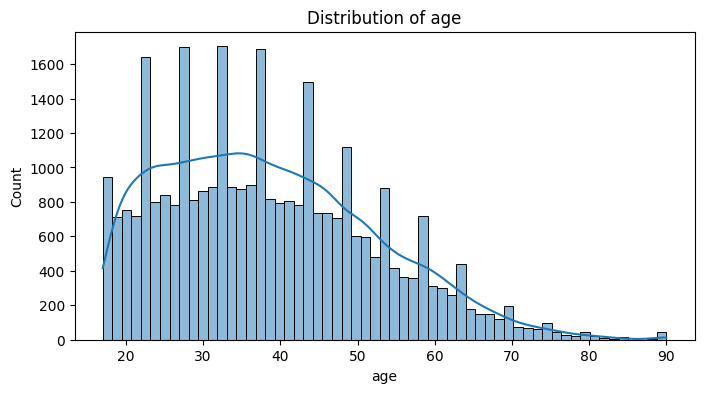

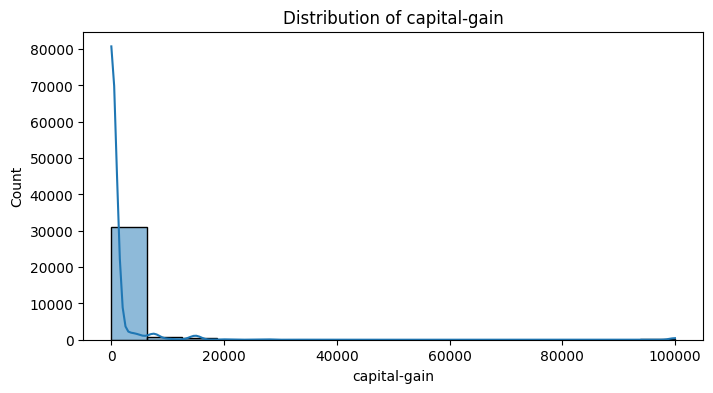

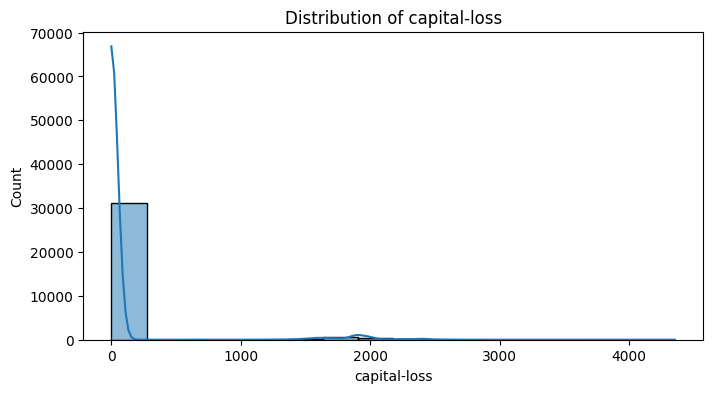

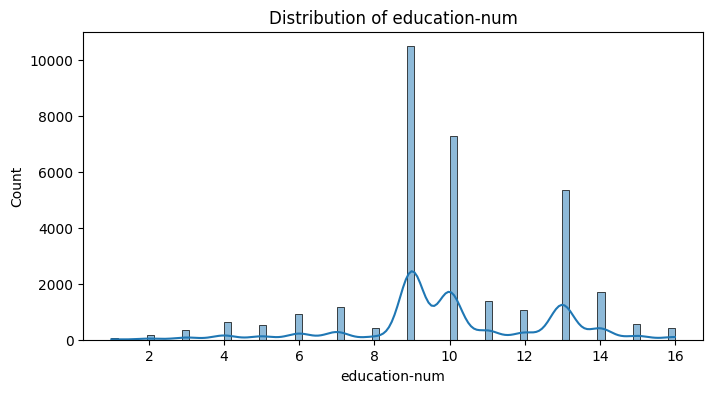

In [34]:
# 4. Histograms for Numerical Features
numerical_cols = ["age", "capital-gain", "capital-loss", "education-num"]
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

- **Distribution of age**
  * *Shape*: Right-skewed distribution with most data concentrated between 20 to 50 years.
  * *Peak*: Around 25-35 years, reflecting a common working-age population.
  * *Tail*: A gradual decline after 50, with fewer individuals above 60.
  * *Outliers*: Few data points beyond 80-90 years, which may require investigation for data quality or specific job roles.

- **Distribution of capital-gain**
  * *Shape*: Extremely Skewed Right (Positive Skew): Majority (≈ 95%) have zero capital gain. 
  * *Insight*: Indicates that capital gains are not common in the dataset, but when present, they are significant.
  * *Outliers*: A few extreme values (outliers) near 100,000, causing the spike on the right.

- **Distribution of capital-loss**
  * *Shape*: Extremely Skewed Right (Positive Skew): Majority (≈ 95%) have zero capital gain.
  * *Outliers*: Few outliers between 2,000–4,300, which significantly deviate from the rest.
  * *Insight*: Suggests that capital loss is rare, but impactful when it occurs.

- **Distribution of education-num (ordinal data)**
  * *Shape*: Peaks at 9 and 10, corresponding to common education levels like High School and Some College. Secondary peaks at higher education levels (e.g., 13–14 for Bachelor's/Master's).
  * *Insight*: Reflects the dominant educational attainment in the dataset, aligned with general population statistics.


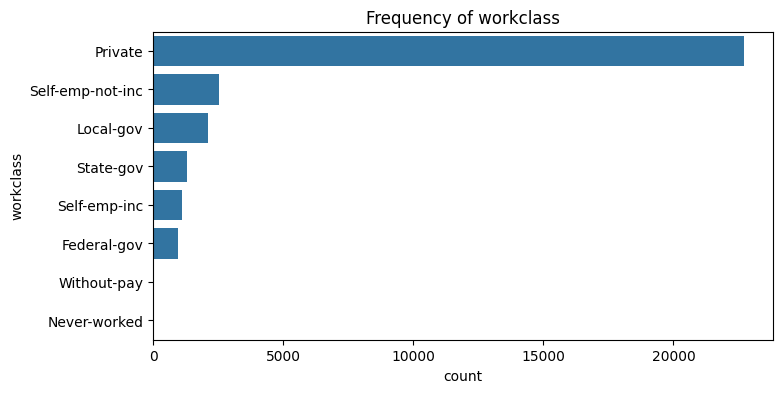

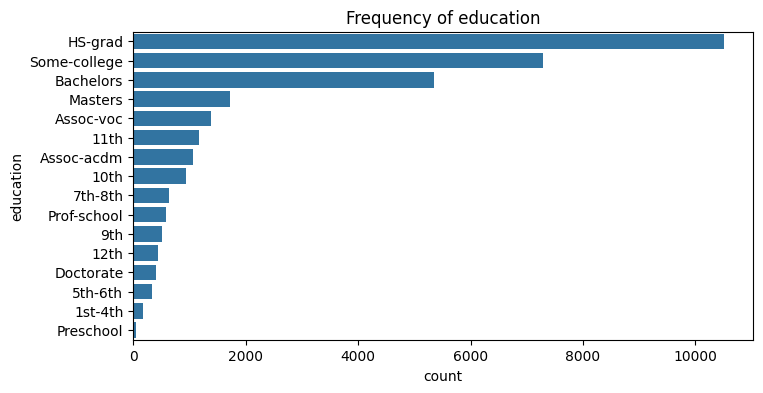

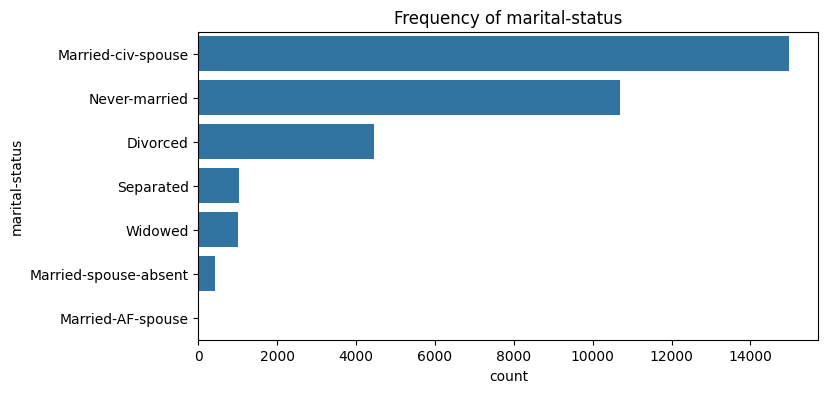

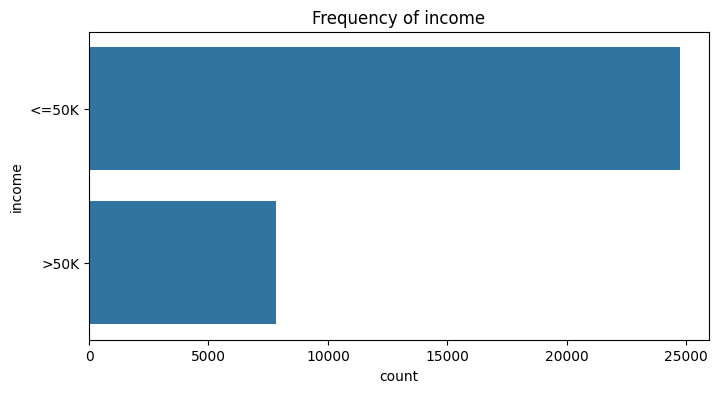

In [35]:
# 5. Bar Plots for Categorical Features
categorical_cols = ["workclass", "education", "marital-status", "income"]
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.show()

- **Frequency of workclass**
  * *Mode value*: "Private" sector dominates the dataset, representing the majority of the working population. Self-employed (not-inc and inc) and government jobs (Local, State, Federal) have moderate representation. "Without-pay" and "Never-worked" are rare, suggesting very few individuals fall into these groups.
  * *Insights*: The dominance of the private sector may introduce bias in models predicting work-related outcomes. Categories with low counts may have limited predictive power.

- **Frequency of education**
  * *Mode value*: "HS-grad" (High School Graduates) and "Some-college" dominate the dataset. Moderate counts for "Bachelors" and "Masters" degrees. Categories like "1st-4th", "5th-6th", and "Preschool" have very few individuals.
  * *Insights*: Reflects a typical workforce distribution, with a strong presence of high school and some college education levels. Rare categories might be candidates for grouping to avoid sparse data issues.

- **Frequency of marital-status**
  * *Mode value*: "Married-civ-spouse" is the most frequent, followed by "Never-married". Divorced/Separated/Widowed have noticeable counts but much lower compared to the top two categories.
  * *Insights*: Could reflect typical demographic trends in the workforce."Married-AF-spouse" and "Married-spouse-absent" are rare, which might affect model performance if not handled properly.

- **Frequency of income**
  * *Values*: "<=50K" dominates the dataset, while ">50K" has significantly fewer observations. This imbalance could affect models.
  * *Insights*: Might require techniques like resampling (oversampling/undersampling) or using balanced class weights in models. This imbalance could lead to biased models favoring the majority class (<=50K).

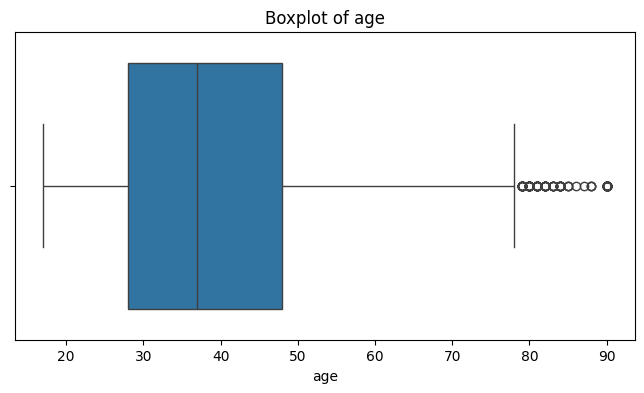

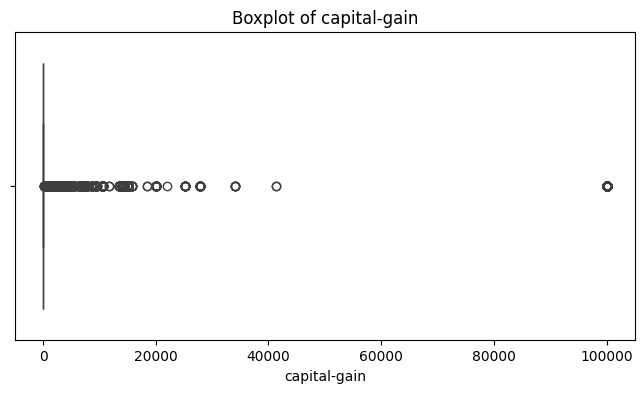

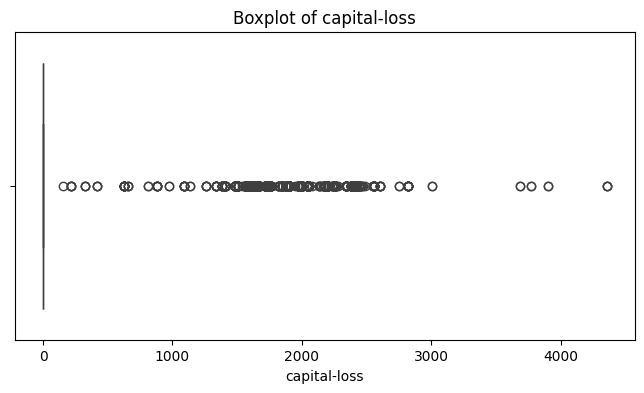

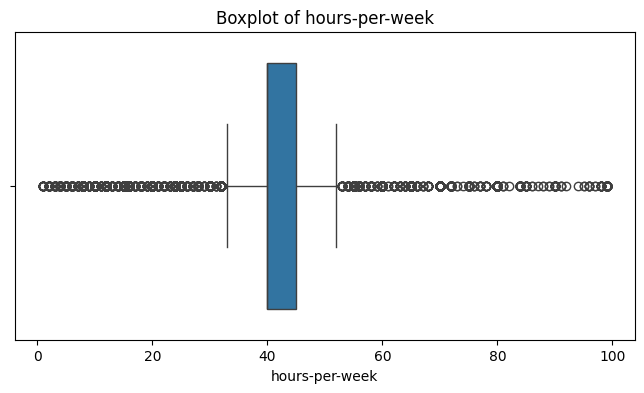

In [36]:
# 6. Outlier Detection (Boxplot)
num_columns = ["age", "capital-gain", "capital-loss", "hours-per-week"]
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

- **Boxplot of age**
  *  The median age is around 38–40 years, which aligns with the descriptive statistics.
  *  There are several outliers beyond 80 years, with some data points reaching close to 90 years.
  *  The distribution appears right-skewed, as the whisker on the upper end is longer.
  *  Outliers could represent elderly individuals still in the workforce, which might be legitimate but rare - decided to eliminate the individuals over 80 yo

- **Boxplot of capital-gain**
  *  A large concentration of data points is near zero, indicating that most individuals have little to no capital gain.
  *  There are extreme outliers reaching up to 100,000, with visible gaps between the upper whisker and these points.
  *  The distribution is highly right-skewed.
  *  These outliers likely represent individuals with exceptional investment returns or bonuses that could distort regression models if not handled properly. In preprocessing step - ignoring 0 value as is the most common, an IQR-based capping was applied on non-zero values.

- **Boxplot of capital-loss**
  *  Similar to capital-gain, there's a dense cluster near zero.
  *  Outliers extend up to around 4,300, with many isolated points beyond the whiskers.
  *  Indicates high skewness with rare but significant capital losses.
  *  In preprocessing step - ignoring 0 value as is the most common, an IQR-based capping was applied on non-zero values.

- **Boxplot of hours-per-week**
  *  The median is at 40 hours, which reflects a standard full-time workweek.
  *  There are numerous outliers on both ends: Low end (<20 hours): Part-time workers or special work arrangements. High end (>60 hours): Overtime, multiple jobs, or high-demand roles.
  *  The distribution shows mild skewness with a concentration around 40–50 hours.
  *  In preprocessing step - extreme high values (>80 hours) were capped.

age  fnlwgt  capital-gain  capital-loss  hours-per-week
age             1.00   -0.08          0.08          0.06            0.07
fnlwgt         -0.08    1.00          0.00         -0.01           -0.02
capital-gain    0.08    0.00          1.00         -0.03            0.08
capital-loss    0.06   -0.01         -0.03          1.00            0.05
hours-per-week  0.07   -0.02          0.08          0.05            1.00

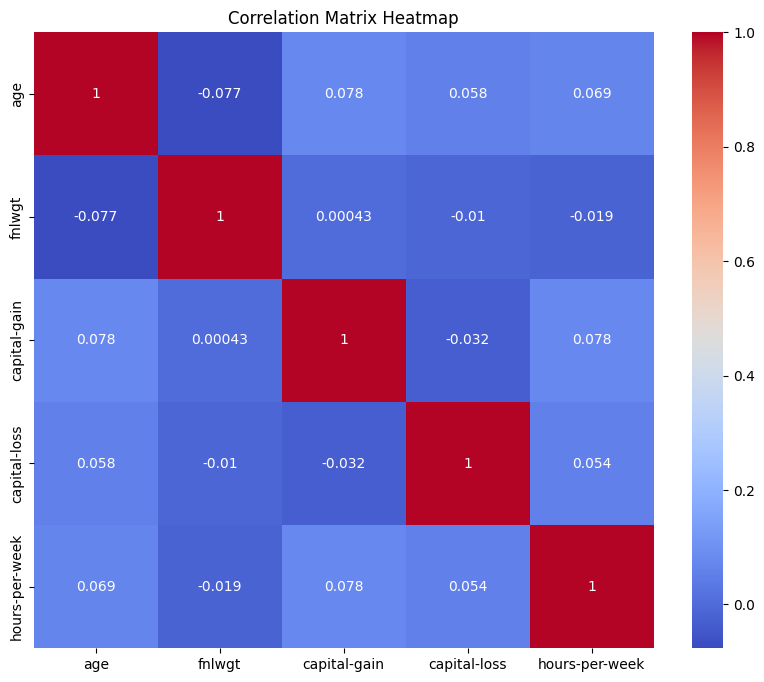

In [37]:
# 7. Correlation Matrix - Excluding 'education-num' because is ordinal
numeric_data = data.select_dtypes(include=[np.number]).drop(columns=['education-num'])  
corr_matrix = numeric_data.corr()

# Display correlation matrix as a table
corr_table = corr_matrix.round(2)
display(corr_table)  # Display as a formatted table in Jupyter Notebook

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

- The correlation matrix shows that capital-gain has the strongest positive correlation with the target variable hours-per-week, with a correlation coefficient of 0.078. While this is a weak correlation, it's the highest among the numerical features.
- The positive Correlation indicates that, generally, as the capital-gain increases, people tend to work more hours per week.
Although it's the strongest in the dataset, a value of 0.078 still indicates a quite weak linear relationship. So, while capital-gain has an influence, it’s not the only factor affecting work hours.

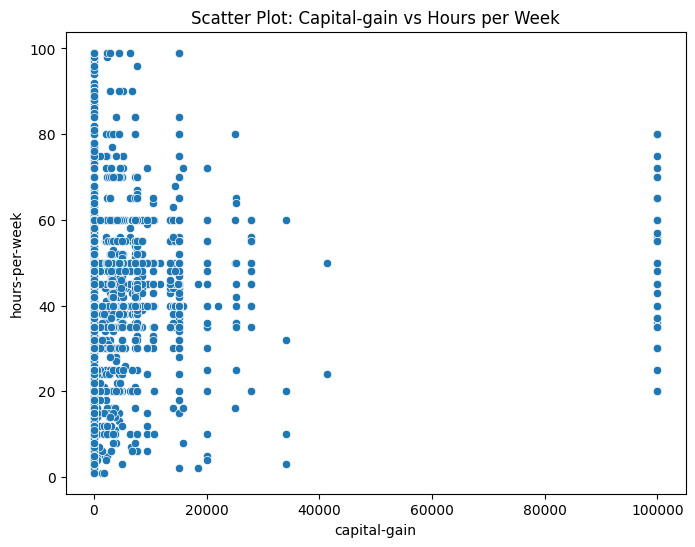

In [38]:
# 8. Scatter Plot for Strongest Correlated Variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['capital-gain'], y=data['hours-per-week'])
plt.title(f'Scatter Plot: Capital-gain vs Hours per Week')
plt.show()

- It does look quite interesting, doesn't it? This type of scatter plot often happens when the data is heavily skewed, like with capital-gain, where many observations are clustered around zero with occasional high spikes.

- Most individuals have zero or very low capital gains, while a few have extremely high values. This creates a dense vertical line at zero and scattered dots for higher values.
- **No Clear Linear Relationship**: The data doesn’t show a strong trend, which is expected since capital gains may not directly influence hours worked.
- Potential Fixes: applying a log transformation ignoring the zero values to try to spread out the data for better visualization.


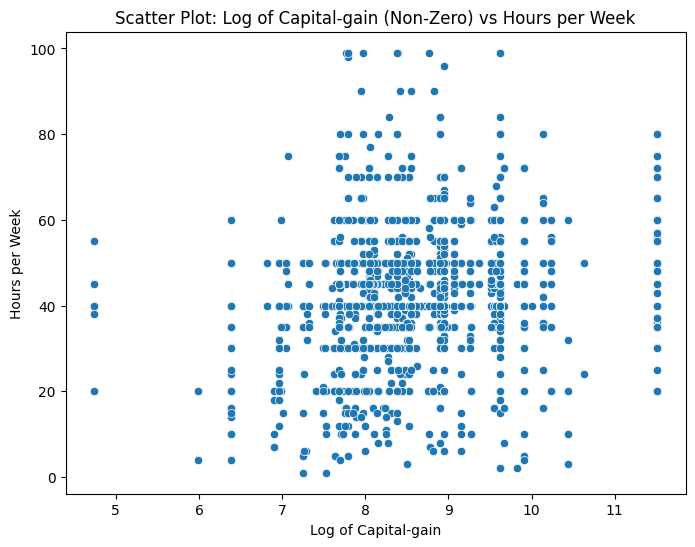

In [39]:
# Apply log transformation excluding zeros
non_zero_data = data[data['capital-gain'] > 0].copy()  # Create a copy to avoid the warning
non_zero_data.loc[:, 'log_capital_gain'] = np.log(non_zero_data['capital-gain'])

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=non_zero_data['log_capital_gain'], y=non_zero_data['hours-per-week'])
plt.title('Scatter Plot: Log of Capital-gain (Non-Zero) vs Hours per Week')
plt.xlabel('Log of Capital-gain')
plt.ylabel('Hours per Week')
plt.show()

- The scatter plot still seems quite dispersed without any strong linear trend. This suggests that capital-gain may not have a strong direct relationship with hours-per-week, even after transformation.

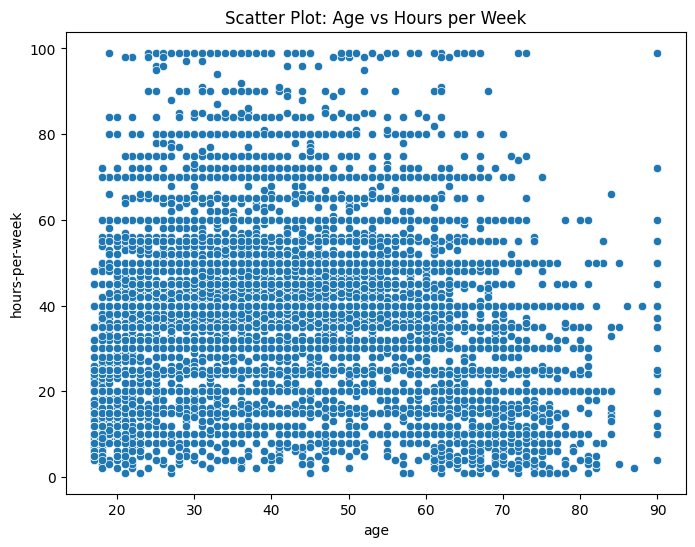

In [40]:
# 8. Scatter Plot for 2nd Strongest Correlated Variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['hours-per-week'])
plt.title(f'Scatter Plot: Age vs Hours per Week')
plt.show()

- Most data points are concentrated between ages 25 to 60, where individuals tend to work anywhere between 30 to 50 hours per week.
This is expected as this range represents the core working population.
- Interestingly, people of various ages, even older adults (60+), are working 60+ hours per week. This could indicate self-employment, high-demand jobs, or outliers.
- There are fewer individuals below 20 years and above 70 years working full-time hours, which aligns with typical education and retirement ages
- Some individuals are working close to 100 hours per week, regardless of age. This could indicate extreme work conditions, multiple jobs, or data anomalies.
- **No Clear Trend**: the scatter does not show a strong linear correlation between age and hours-per-week. The distribution seems more spread out without a clear increasing or decreasing trend as age increases.
- To analyze patterns more clearly, we can segment the age variable into different groups based on life stages or employment trends. 
  *  Youth (17–24 years)
  *  Early Career (25–34 years)
  *  Mid Career (35–54 years)
  *  Late Career (55–64 years)
  *  Retirement Age (65+ years)

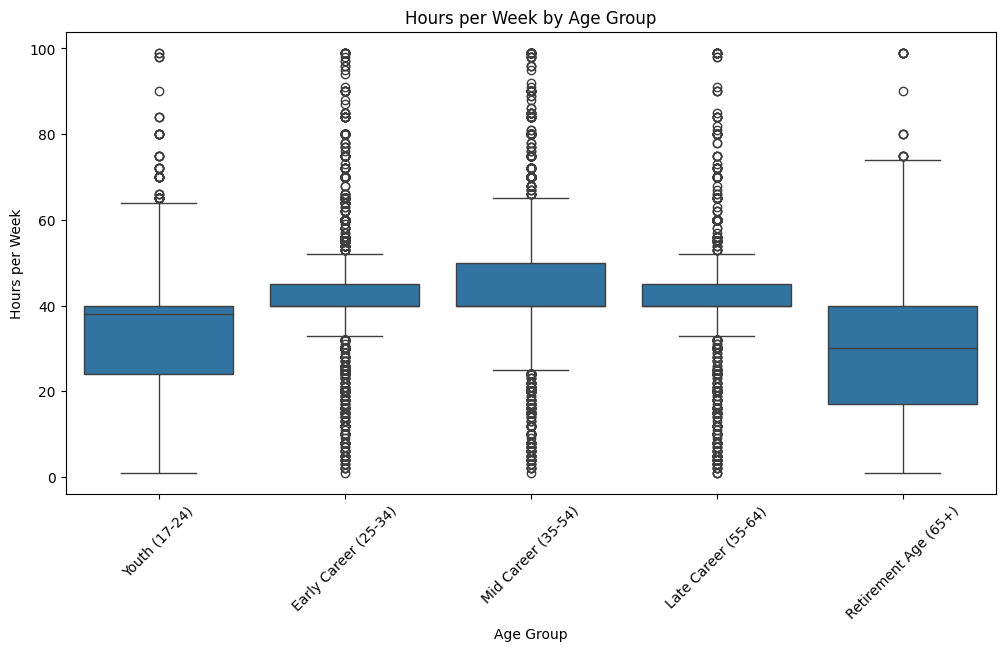

                       mean  median    std
age_group                                 
Early Career (25-34)  42.15    40.0  10.77
Late Career (55-64)   40.41    40.0  12.51
Mid Career (35-54)    43.39    40.0  10.87
Retirement Age (65+)  29.83    30.0  16.43
Youth (17-24)         32.97    38.0  12.45


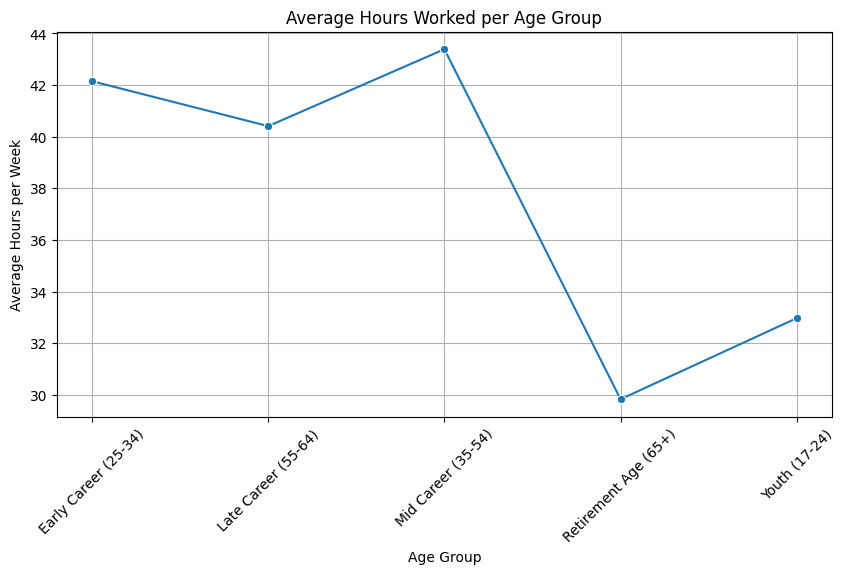

In [41]:
# Segmenting Data into Age Groups
age_groups = {
    'Youth (17-24)': (17, 24),
    'Early Career (25-34)': (25, 34),
    'Mid Career (35-54)': (35, 54),
    'Late Career (55-64)': (55, 64),
    'Retirement Age (65+)': (65, data['age'].max())
}

# Assigning Age Group Labels
def assign_age_group(age):
    for group, (start, end) in age_groups.items():
        if start <= age <= end:
            return group
    return 'Unknown'

data['age_group'] = data['age'].apply(assign_age_group)

# Boxplot for Hours per Week Across Age Groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='hours-per-week', data=data, order=list(age_groups.keys()))
plt.title('Hours per Week by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Hours per Week')
plt.xticks(rotation=45)
plt.show()

# Descriptive Statistics for Each Age Group
age_group_stats = data.groupby('age_group')['hours-per-week'].agg(['mean', 'median', 'std']).round(2)
print(age_group_stats)

# Line Plot for Average Hours Worked by Age Group
plt.figure(figsize=(10, 5))
sns.lineplot(x=age_group_stats.index, y=age_group_stats['mean'], marker='o')
plt.title('Average Hours Worked per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Hours per Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

 - Some more interesting insights can be drawn from the relationship between age and hours-per-week in comparison with capital-gain. Even though the corr coefficient was a bit smaller for the age variable, the insights are quite more valuable:

**Boxplot: Hours per Week by Age Group**
- **Youth (17-24):**
  *  Median Hours: Lower compared to other groups, around 35-40 hours.
  *  Variability: High variability with many outliers, reflecting part-time jobs, internships, or irregular work schedules common among students.
  *  Outliers: Significant number of outliers above 60 hours, indicating some young individuals working extended hours.
- **Early Career (25-34):**
  *  Median Hours: Slightly higher than the Youth group, close to 40-45 hours.
  *  Variability: Less spread compared to the Youth group, suggesting more stable work hours typical of full-time employment.
  *  Outliers: Some individuals working long hours (above 60), likely due to career-building efforts or high-demand professions.
- **Mid Career (35-54):**
  *  Median Hours: The highest among all groups, around 45 hours.
  *  Consistency: Work hours are more consistent, indicating stable full-time employment. This aligns with peak productivity years where individuals often take on managerial or demanding roles.
  *  Outliers: Present but less frequent compared to younger age groups.
- **Late Career (55-64):**
  *  Median Hours: Slight decline compared to the Mid Career group, around 40-42 hours.
  *  Variability: Slight increase in variability as some individuals may begin transitioning to part-time roles or preparing for retirement.
- **Retirement Age (65+):**
  *  Median Hours: Significantly lower, around 20-30 hours.
  *  Variability: High variability due to part-time work, consulting, or phased retirement plans.
  *  Outliers: Still some outliers with individuals working full-time or even extended hours, which could represent business owners, consultants, or passionate professionals continuing to work.

**Line Plot: Average Hours Worked per Age Group**
  *  The average hours worked increase from the Youth group to peak during Mid Career (35-54), reflecting the prime working years.
  *  Decline starts in the Late Career (55-64) group, likely due to reduced workloads, flexible schedules, or early retirement plans.
  *  A sharp drop is observed in the Retirement Age (65+), where many individuals work part-time or not at all.

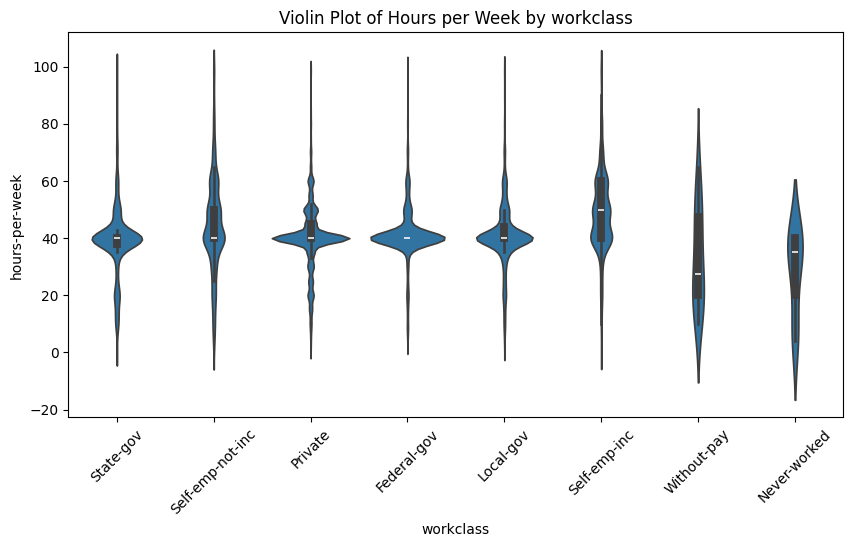

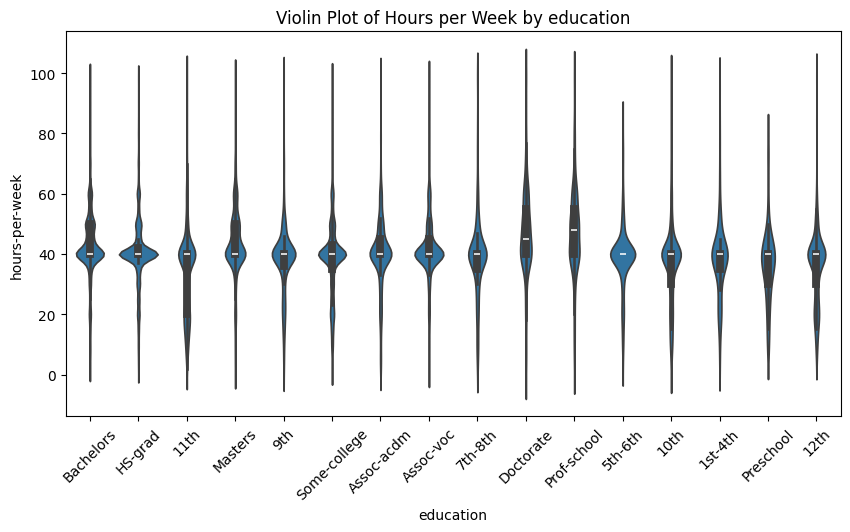

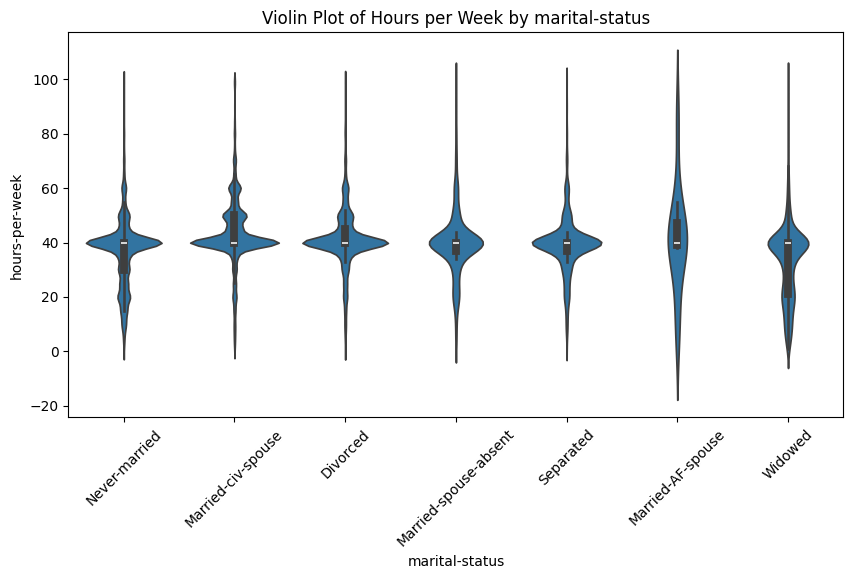

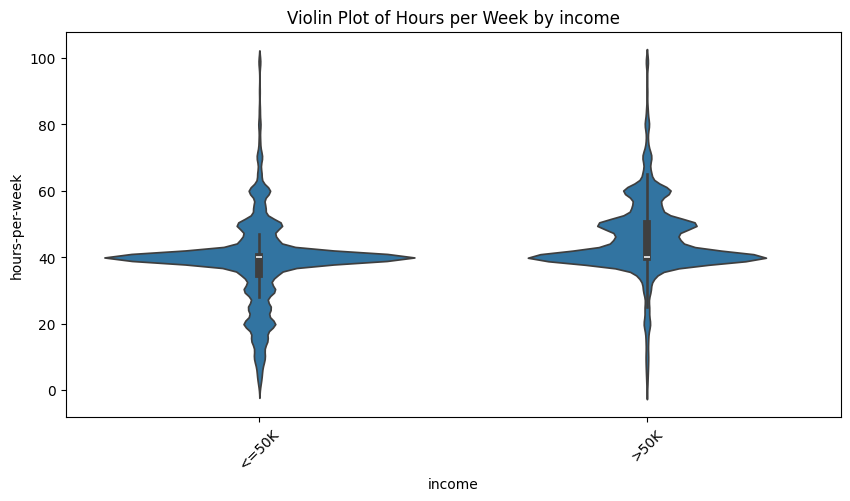

In [42]:
# 9. Violin plots for Categorical Variables vs Hours per Week
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=data[col], y=data['hours-per-week'])
    plt.xticks(rotation=45)
    plt.title(f'Violin Plot of Hours per Week by {col}')
    plt.show()

**Workclass vs. Hours per Week:**
Private sector workers have the most concentrated distribution around 40 hours/week, indicating a standard full-time schedule.
Self-employed (inc and not-inc) individuals show a broader spread, with some working significantly more than 40 hours, reflecting the flexible nature of self-employment.
Without-pay and Never-worked categories show much lower median hours and high variance, as expected.

**Education vs. Hours per Week:**
Across most education levels, the median hours hover around 40 hours/week.
Higher education levels (e.g., Doctorate, Prof-school) tend to have slightly longer working hours with broader variability, possibly due to professional roles requiring flexible or extended hours.
Lower education levels (e.g., 1st-4th, Preschool) show more concentrated distributions with fewer working hours.

**Marital Status vs. Hours per Week:**
Married-civ-spouse individuals have slightly higher medians compared to never-married or widowed, suggesting that married individuals may work longer hours, possibly to support family responsibilities.
Divorced and separated groups show more spread, indicating variability in working patterns.

**Income vs. Hours per Week:**
A clear distinction: individuals earning >50K tend to work more hours, with their median significantly above those earning <=50K.
The distribution for the >50K group also shows a wider spread, highlighting the association between longer hours and higher income.

## Summary Report:

- The target variable 'hours-per-week' shows a right-skewed distribution with a concentration around 40 hours, indicating a standard workweek norm.
- Missing values are mostly found in 'workclass', 'occupation', and 'native-country', with percentages below 5%.
- A weak correlation detected between 'hours-per-week' and 'capital-gain' (after log transformation) and 'age'.
- Categorical variables like 'income', 'marital-status', 'education', and 'workclass' show clear differences in hours worked. Higher income groups tend to work longer hours.
- Age segmentation reveals that mid-career individuals (35-54) work the most hours, while retirement-age individuals (65+) work significantly fewer hours.

Areas for further investigation include:
- Delving deeper into the relationship between education levels and working hours.
- Examining outliers and their potential impact on predictive modeling.
- Exploring the effects of regional factors by analyzing 'native-country' distributions.

# FOR PREPROCESSED DATA FROM TASK 1

In [87]:
# Load Preprocessed Data
proc_data = pd.read_csv("full_preprocessed_data.csv")
proc_data.sample(5)

hours-per-week   age    fnlwgt  education-num  sex  capital-gain  \
18592            55.0  39.0  190297.0           16.0    1      9.617471   
30664            55.0  25.0  158751.0           11.0    1      0.000000   
685               4.0  66.0  149422.0            4.0    1      0.000000   
21194            45.0  37.0  160920.0           10.0    1      0.000000   
24458            50.0  30.0  209317.0            9.0    1      0.000000   

       capital-loss  income  workclass_Local-gov  workclass_Never-worked  ...  \
18592           0.0       1                    0                       0  ...   
30664           0.0       0                    0                       0  ...   
685             0.0       0                    0                       0  ...   
21194           0.0       0                    0                       0  ...   
24458           0.0       0                    0                       0  ...   

       race_Other  race_White  education_age_ratio  is_independent  \
18592           0           1             0.400000               0   
30664           0           1             0.423077               0   
685             0           1             0.059701               1   
21194           0           1             0.263158               0   
24458           0           1             0.290323               1   

       capital_net  male_with_own_child  age_group_Early Career (25-34)  \
18592     9.617471                    0                               0   
30664     0.000000                    0                               1   
685       0.000000                    0                               0   
21194     0.000000                    0                               0   
24458     0.000000                    0                               1   

       age_group_Mid Career (35-54)  age_group_Late Career (55-64)  \
18592                             1                              0   
30664                             0                              0   
685                               0                              0   
21194                             1                              0   
24458                             0                              0   

       age_group_Retirement Age (65+)  
18592                               0  
30664                               0  
685                                 1  
21194                               0  
24458                               0  

[5 rows x 38 columns]

In [88]:
numeric_cols = proc_data.select_dtypes(include=["int64", "float64"]).columns
binary_cols = [col for col in numeric_cols if proc_data[col].nunique() == 2]
exclude_cols = binary_cols + ['education-num', 'hours-per-week']
continuous_cols = [col for col in numeric_cols if col not in exclude_cols]

print(numeric_cols)
print(binary_cols)
print(continuous_cols)

Index(['hours-per-week', 'age', 'fnlwgt', 'education-num', 'sex',
       'capital-gain', 'capital-loss', 'income', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'education_age_ratio', 'is_independent', 'capital_net',
       'male_with_own_child', 'age_group_Early Career (25-34)',
       'age_group_Mid Career (35-54)', 'age_group_Late Career (55-64)',
       'age_group_Retirement Age (65+)'],
     

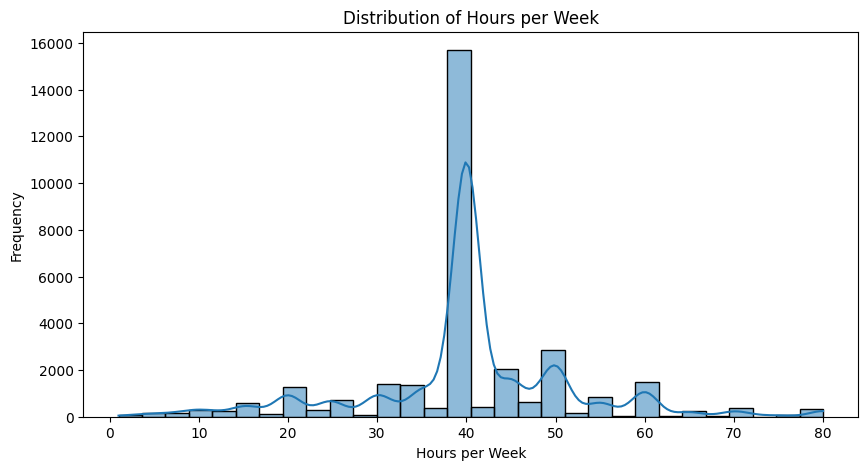

In [89]:
# 1. Analyze Target Variable (hours-per-week)
plt.figure(figsize=(10, 5))
sns.histplot(proc_data['hours-per-week'], kde=True, bins=30)
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

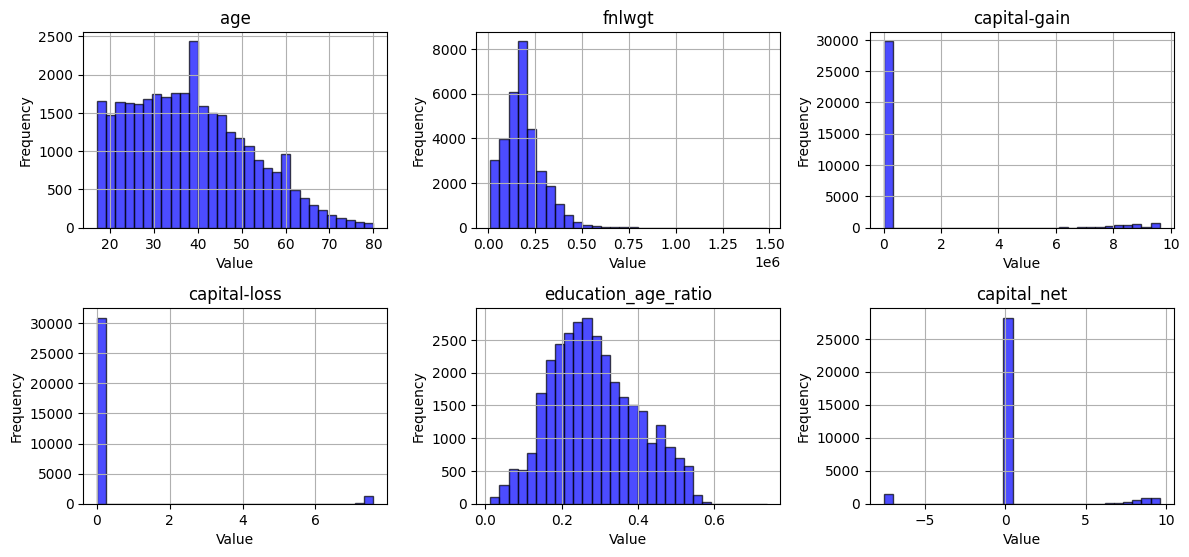

In [90]:
# Plot histograms for continuous variables before noromalizing
plt.figure(figsize=(12, 8))
for i, col in enumerate(continuous_cols):
    plt.subplot(len(continuous_cols) // 3 + 1, 3, i + 1)  # Arrange in a grid
    plt.hist(proc_data[col].dropna(), bins=30, alpha=0.7, color="blue", edgecolor="black")
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [91]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Normalize only continuous variables
proc_data[continuous_cols] = scaler.fit_transform(proc_data[continuous_cols])


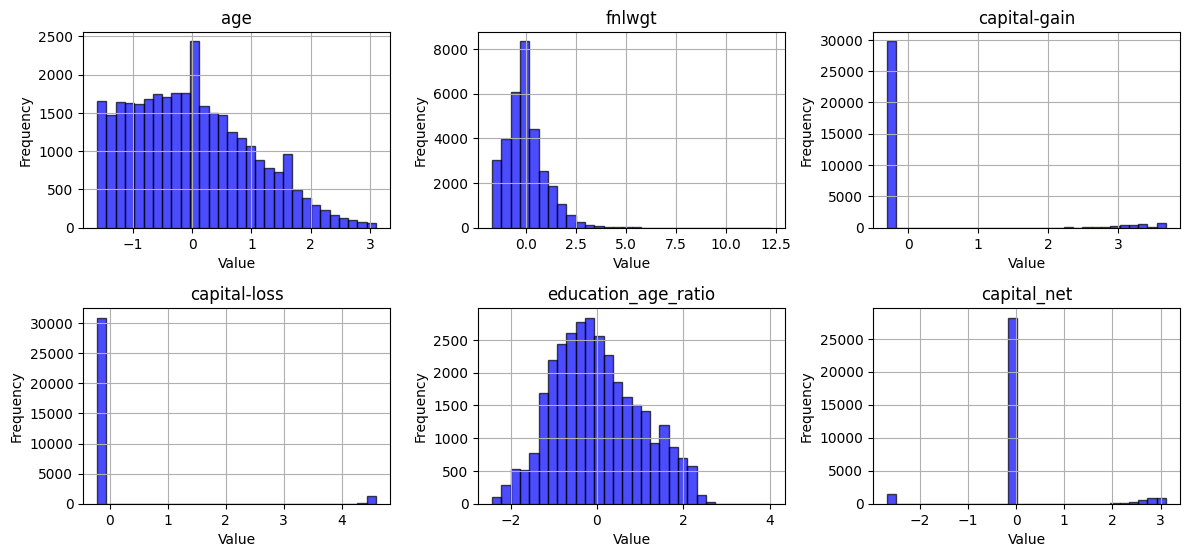

In [92]:
# Plot histograms for continuous variables AFTER noromalizing
plt.figure(figsize=(12, 8))
for i, col in enumerate(continuous_cols):
    plt.subplot(len(continuous_cols) // 3 + 1, 3, i + 1)  # Arrange in a grid
    plt.hist(proc_data[col].dropna(), bins=30, alpha=0.7, color="blue", edgecolor="black")
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [93]:
proc_data.sample(5)

hours-per-week       age    fnlwgt  education-num  sex  capital-gain  \
5425             40.0  0.712883 -0.703330           13.0    1     -0.299987   
9528             45.0  1.309609 -0.145123           13.0    0     -0.299987   
28760            37.0  0.339929 -1.528445           13.0    1     -0.299987   
25202            10.0  0.190748 -0.876698           11.0    0     -0.299987   
19429            40.0 -1.002703  0.439467            9.0    1     -0.299987   

       capital-loss  income  workclass_Local-gov  workclass_Never-worked  ...  \
5425      -0.221081       0                    0                       0  ...   
9528      -0.221081       1                    0                       0  ...   
28760     -0.221081       1                    0                       0  ...   
25202     -0.221081       0                    0                       0  ...   
19429     -0.221081       0                    0                       0  ...   

       race_Other  race_White  education_age_ratio  is_independent  \
5425            0           1            -0.177912               0   
9528            0           1            -0.510046               1   
28760           0           1             0.091004               0   
25202           0           1            -0.208251               0   
19429           0           1             0.543228               0   

       capital_net  male_with_own_child  age_group_Early Career (25-34)  \
5425     -0.126242                    0                               0   
9528     -0.126242                    0                               0   
28760    -0.126242                    0                               0   
25202    -0.126242                    0                               0   
19429    -0.126242                    0                               1   

       age_group_Mid Career (35-54)  age_group_Late Career (55-64)  \
5425                              1                              0   
9528                              0                              1   
28760                             1                              0   
25202                             1                              0   
19429                             0                              0   

       age_group_Retirement Age (65+)  
5425                                0  
9528                                0  
28760                               0  
25202                               0  
19429                               0  

[5 rows x 38 columns]

In [94]:
# 2. Descriptive Statistics
print(proc_data.describe().round(2))

       hours-per-week       age    fnlwgt  education-num       sex  \
count        32439.00  32439.00  32439.00       32439.00  32439.00   
mean            40.39      0.00     -0.00          10.08      0.67   
std             12.00      1.00      1.00           2.57      0.47   
min              1.00     -1.60     -1.68           1.00      0.00   
25%             40.00     -0.78     -0.68           9.00      0.00   
50%             40.00     -0.11     -0.11          10.00      1.00   
75%             45.00      0.64      0.45          12.00      1.00   
max             80.00      3.10     12.26          16.00      1.00   

       capital-gain  capital-loss    income  workclass_Local-gov  \
count      32439.00      32439.00  32439.00             32439.00   
mean          -0.00         -0.00      0.24                 0.06   
std            1.00          1.00      0.43                 0.25   
min           -0.30         -0.22      0.00                 0.00   
25%           -0.30         -

In [95]:
# 3. Missing Values Analysis

missing_data = proc_data.isnull().sum()
missing_percentage = (missing_data / len(proc_data)) * 100
missing_report = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_report)

                                      Missing Values  Percentage
hours-per-week                                     0         0.0
age                                                0         0.0
fnlwgt                                             0         0.0
education-num                                      0         0.0
sex                                                0         0.0
capital-gain                                       0         0.0
capital-loss                                       0         0.0
income                                             0         0.0
workclass_Local-gov                                0         0.0
workclass_Never-worked                             0         0.0
workclass_Private                                  0         0.0
workclass_Self-emp-inc                             0         0.0
workclass_Self-emp-not-inc                         0         0.0
workclass_State-gov                                0         0.0
workclass_Without-pay    

In [22]:
# 5. Bar Plots for Categorical Features
#categorical_cols = ["workclass", "education", "marital-status", "income", "age_group"]
#for col in categorical_cols:
   # plt.figure(figsize=(8, 4))
    #sns.countplot(y=proc_data[col], order=proc_data[col].value_counts().index)
    #plt.title(f'Frequency of {col}')
    #plt.show()

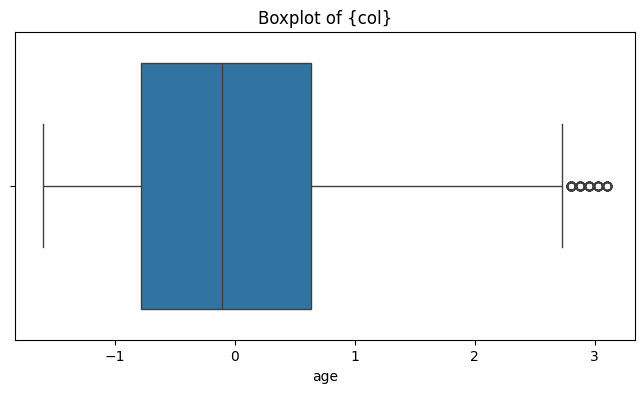

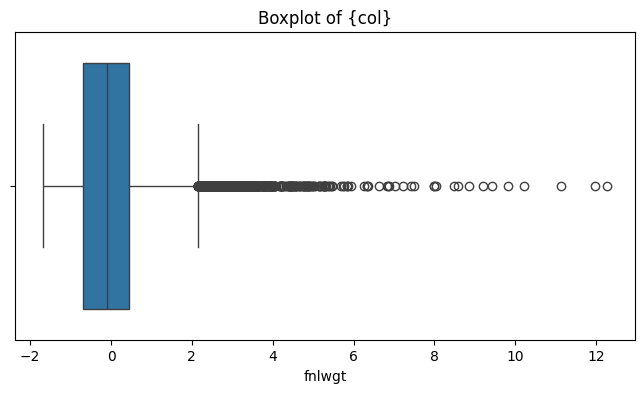

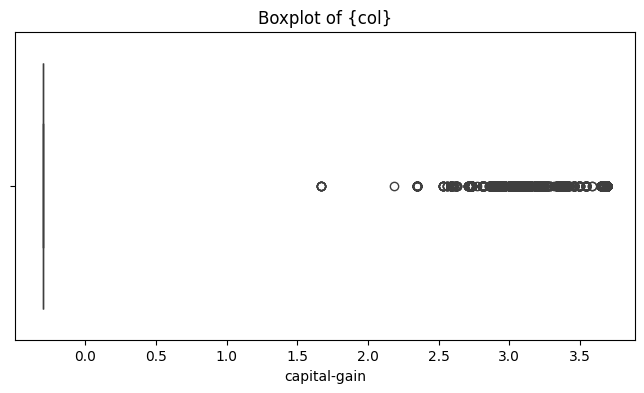

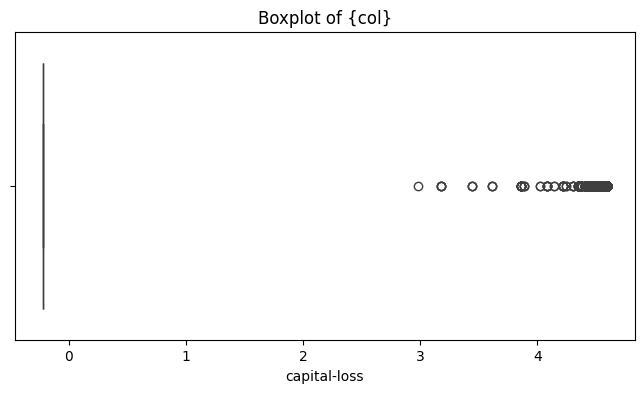

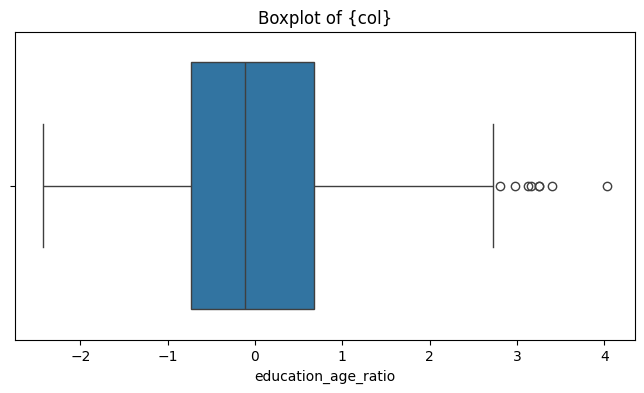

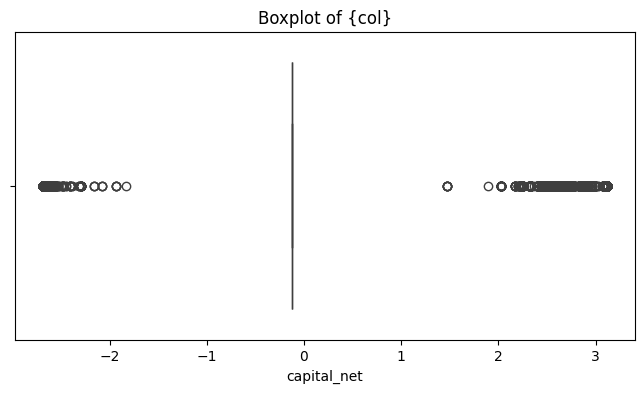

In [97]:
# 6. Outlier Detection (Boxplot)
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=proc_data[col])
    plt.title('Boxplot of {col}')
    plt.show()

In [98]:
# 7. Correlation Matrix and exclude 'education-num' 
corr_matrix = proc_data.corr()

# Display correlation matrix as a table
corr_table = corr_matrix.round(2)
display(corr_table) 

hours-per-week   age  fnlwgt  \
hours-per-week                                  1.00  0.08   -0.02   
age                                             0.08  1.00   -0.08   
fnlwgt                                         -0.02 -0.08    1.00   
education-num                                   0.15  0.04   -0.04   
sex                                             0.23  0.09    0.03   
capital-gain                                    0.08  0.12   -0.00   
capital-loss                                    0.05  0.05   -0.01   
income                                          0.23  0.24   -0.01   
workclass_Local-gov                             0.01  0.06   -0.00   
workclass_Never-worked                         -0.01 -0.02    0.01   
workclass_Private                              -0.11 -0.19    0.04   
workclass_Self-emp-inc                          0.13  0.10   -0.02   
workclass_Self-emp-not-inc                      0.09  0.14   -0.04   
workclass_State-gov                            -0.02  0.01   -0.01   
workclass_Without-pay                          -0.01  0.01   -0.00   
marital-status_Married-AF-spouse                0.00 -0.01   -0.00   
marital-status_Married-civ-spouse               0.22  0.32   -0.03   
marital-status_Married-spouse-absent           -0.01  0.02    0.00   
marital-status_Never-married                   -0.20 -0.54    0.04   
marital-status_Separated                       -0.02  0.01    0.03   
marital-status_Widowed                         -0.10  0.26   -0.02   
relationship_Not-in-family                      0.01 -0.01    0.01   
relationship_Other-relative                    -0.05 -0.07    0.03   
relationship_Own-child                         -0.26 -0.44    0.01   
relationship_Unmarried                         -0.04  0.04    0.00   
relationship_Wife                              -0.07  0.02   -0.02   
race_Asian-Pac-Islander                        -0.00 -0.01   -0.05   
race_Black                                     -0.05 -0.02    0.12   
race_Other                                     -0.01 -0.03    0.01   
race_White                                      0.05  0.03   -0.06   
education_age_ratio                            -0.08 -0.78    0.03   
is_independent                                  0.01 -0.01    0.01   
capital_net                                     0.04  0.07    0.00   
male_with_own_child                            -0.13 -0.31    0.03   
age_group_Early Career (25-34)                  0.08 -0.39    0.03   
age_group_Mid Career (35-54)                    0.21  0.32   -0.03   
age_group_Late Career (55-64)                  -0.00  0.50   -0.04   
age_group_Retirement Age (65+)                 -0.18  0.46   -0.03   

                                      education-num   sex  capital-gain  \
hours-per-week                                 0.15  0.23          0.08   
age                                            0.04  0.09          0.12   
fnlwgt                                        -0.04  0.03         -0.00   
education-num                                  1.00  0.01          0.13   
sex                                            0.01  1.00          0.07   
capital-gain                                   0.13  0.07          1.00   
capital-loss                                   0.08  0.04         -0.07   
income                                         0.34  0.22          0.29   
workclass_Local-gov                            0.10 -0.04          0.01   
workclass_Never-worked                        -0.02  0.00         -0.00   
workclass_Private                             -0.17 -0.07         -0.05   
workclass_Self-emp-inc                         0.08  0.08          0.07   
workclass_Self-emp-not-inc                     0.02  0.11          0.02   
workclass_State-gov                            0.10 -0.02         -0.00   
workclass_Without-pay                         -0.01 -0.00          0.00   
marital-status_Married-AF-spouse               0.00 -0.02          0.00   
marital-status_Married-civ-spous

In [104]:
# Extract correlations of target variable only (excluding self-correlation)
target_corr = corr_matrix['hours-per-week'].drop('hours-per-week').sort_values(ascending=False).round(2)
relevant_corr = target_corr[(target_corr > 0.1) | (target_corr < -0.1)]
display(relevant_corr)

continuous_corr = target_corr[continuous_cols]
display(continuous_corr)

income                               0.23
sex                                  0.23
marital-status_Married-civ-spouse    0.22
age_group_Mid Career (35-54)         0.21
education-num                        0.15
workclass_Self-emp-inc               0.13
workclass_Private                   -0.11
male_with_own_child                 -0.13
age_group_Retirement Age (65+)      -0.18
marital-status_Never-married        -0.20
relationship_Own-child              -0.26
Name: hours-per-week, dtype: float64

age                    0.08
fnlwgt                -0.02
capital-gain           0.08
capital-loss           0.05
education_age_ratio   -0.08
capital_net            0.04
Name: hours-per-week, dtype: float64

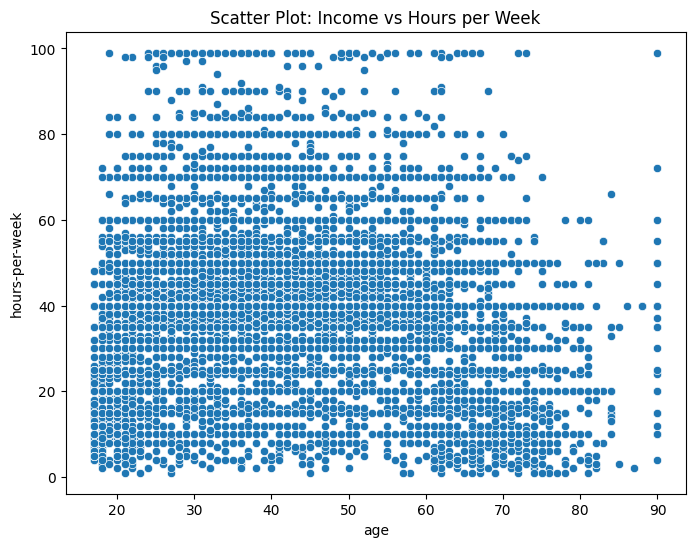

In [ ]:
# 8. Scatter Plot for Strongest Correlated Continuous Variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['hours-per-week'])
plt.title(f'Scatter Plot: Age vs Hours per Week')
plt.show()

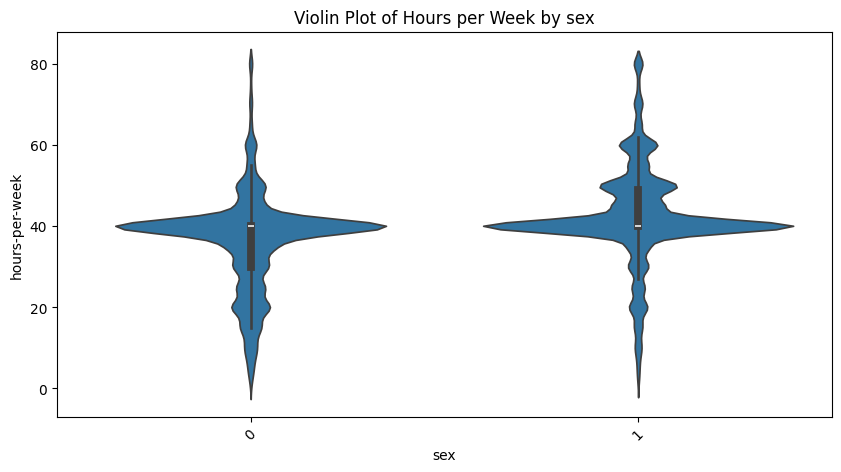

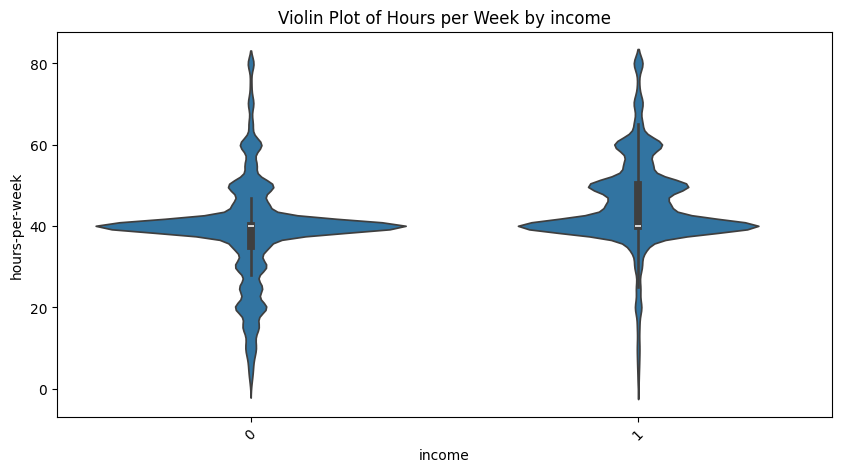

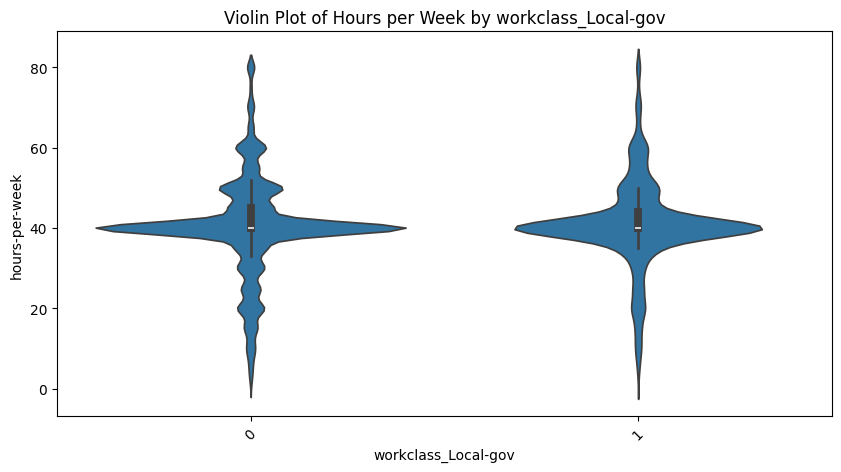

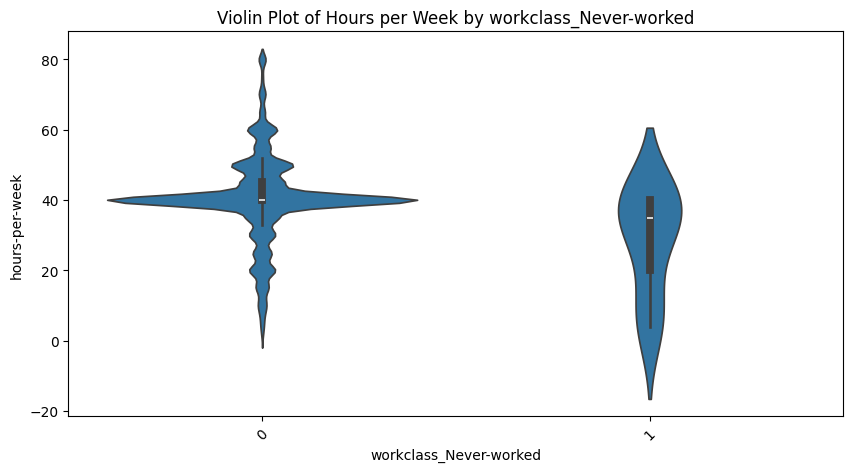

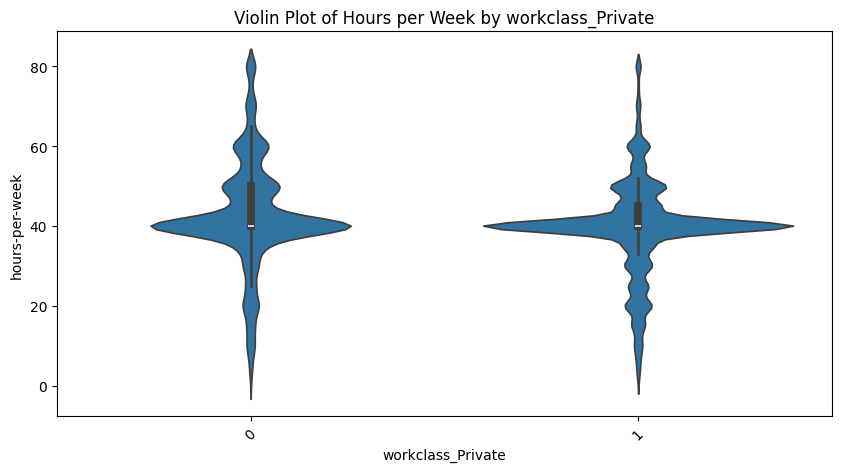

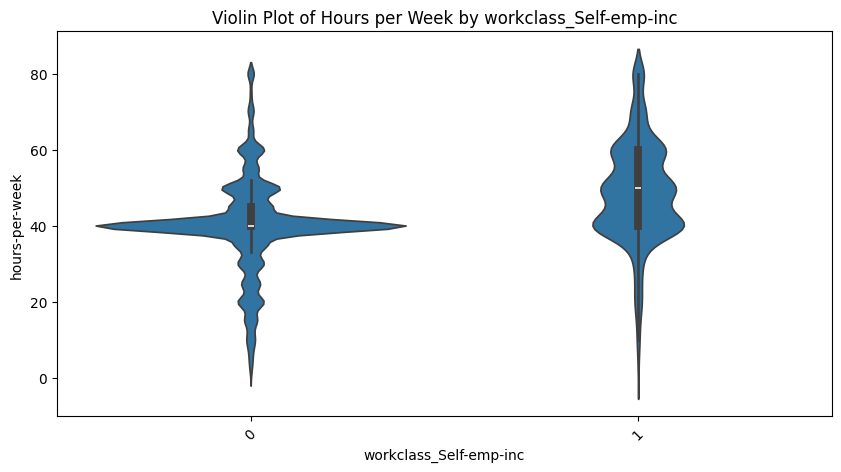

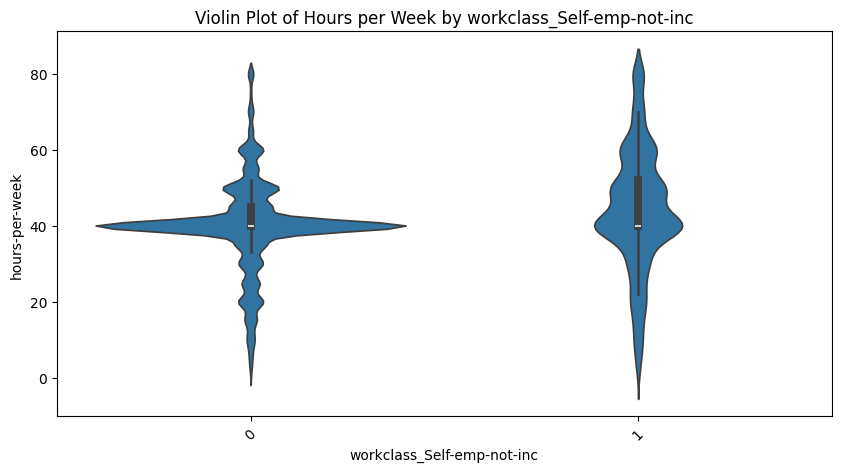

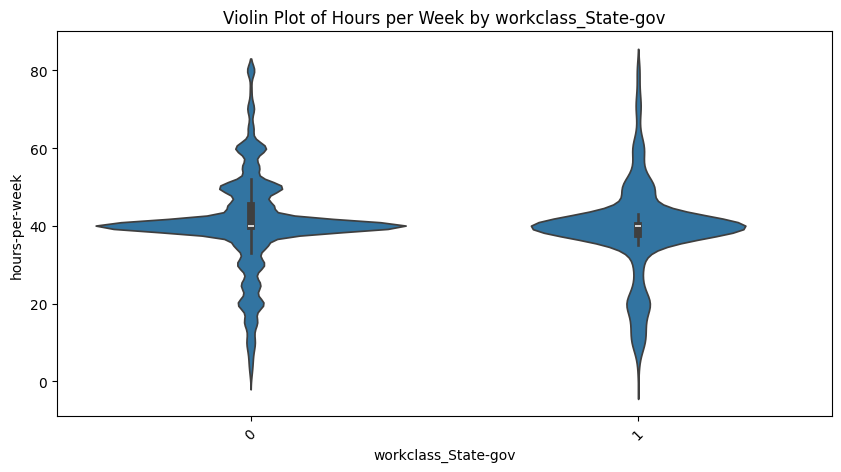

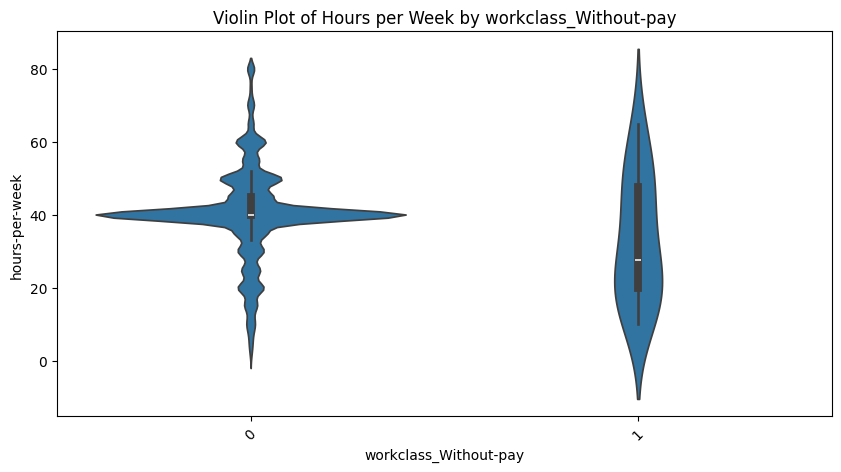

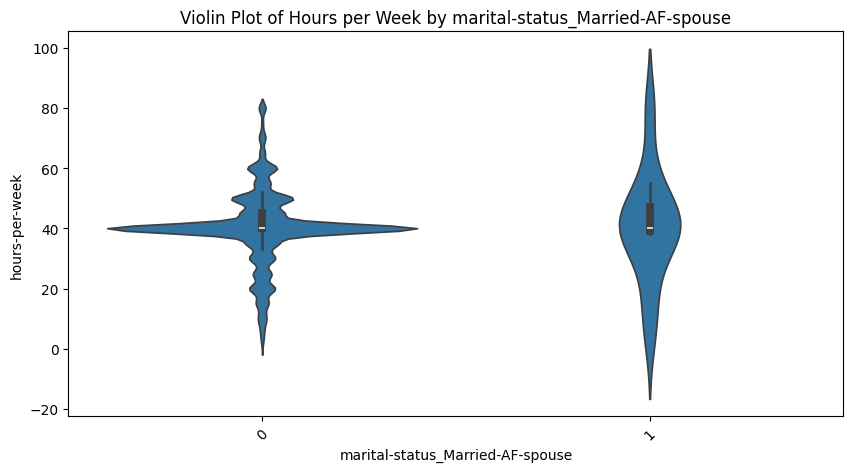

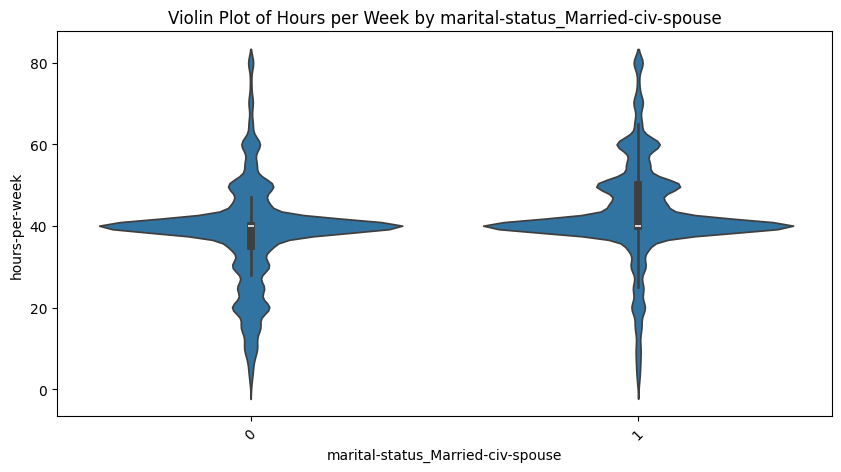

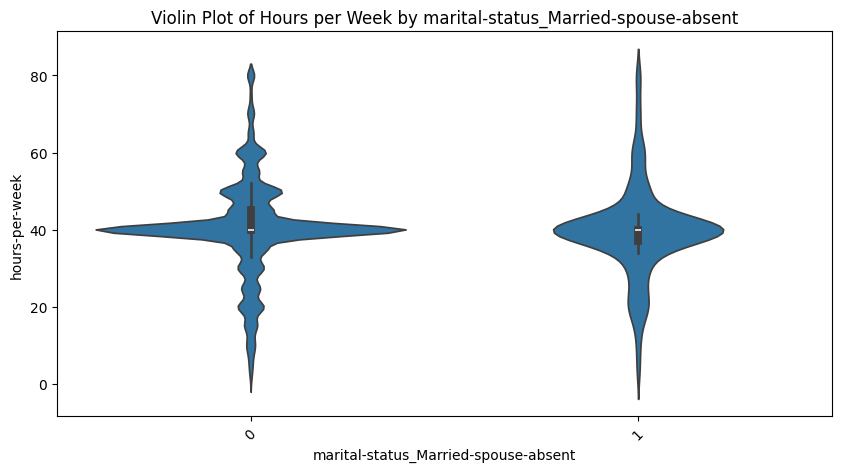

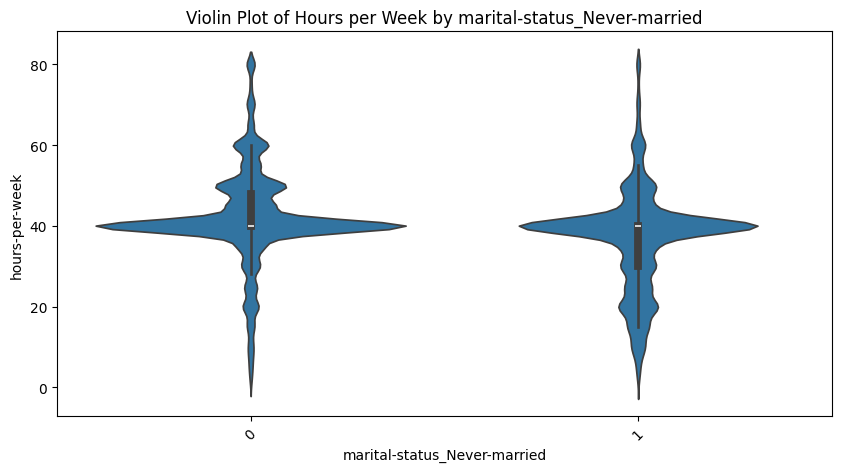

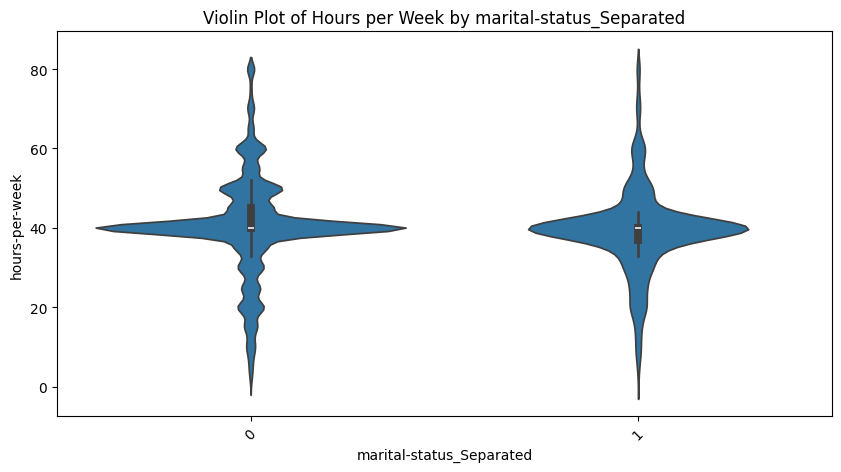

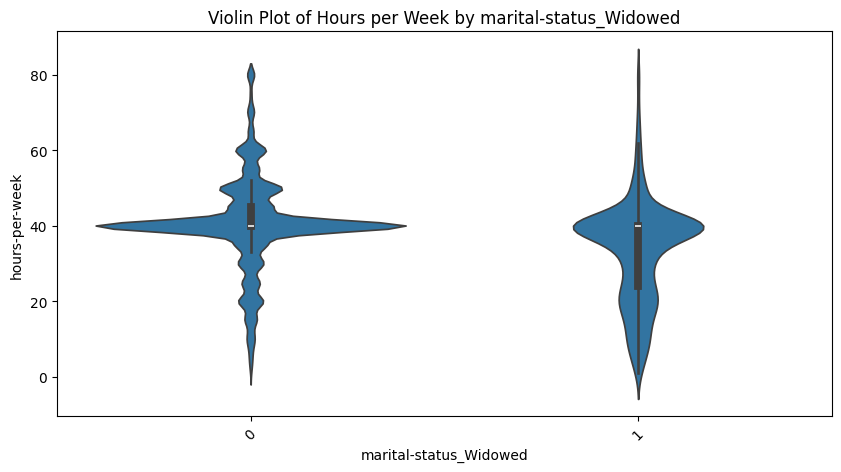

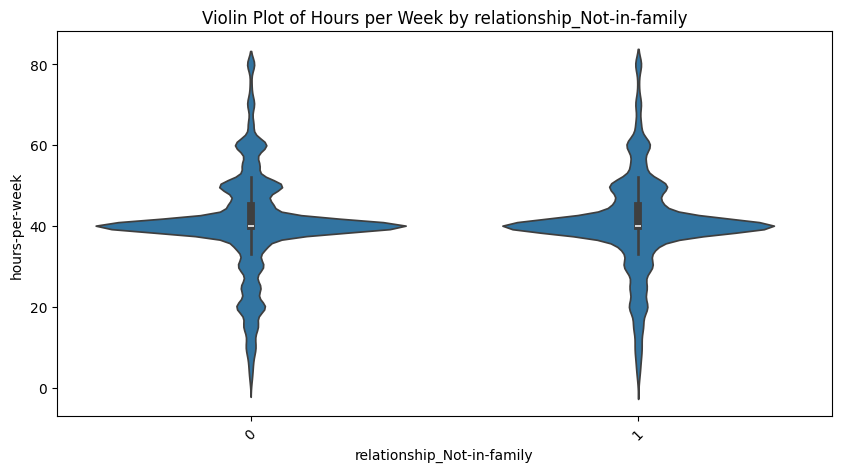

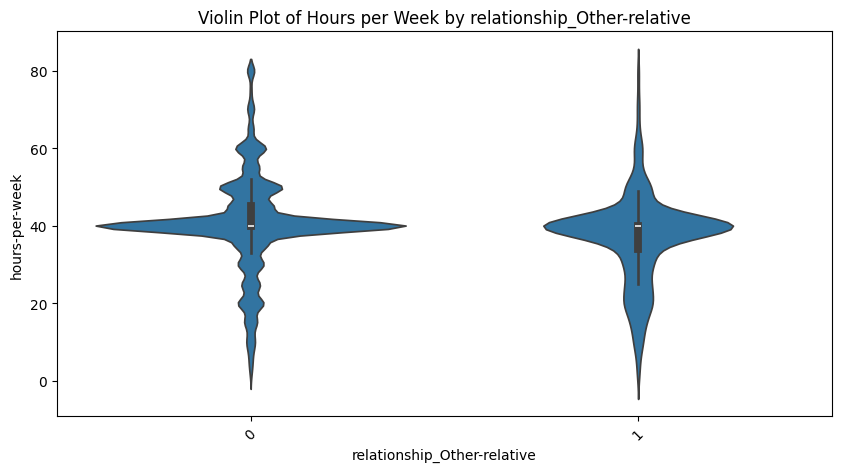

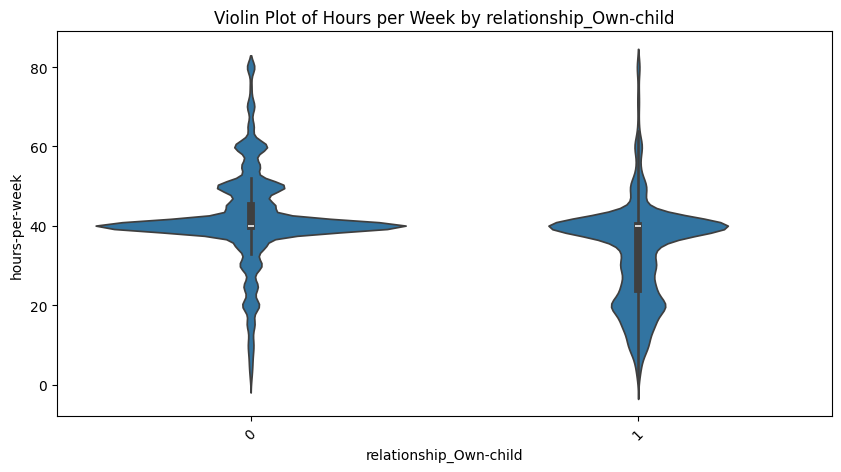

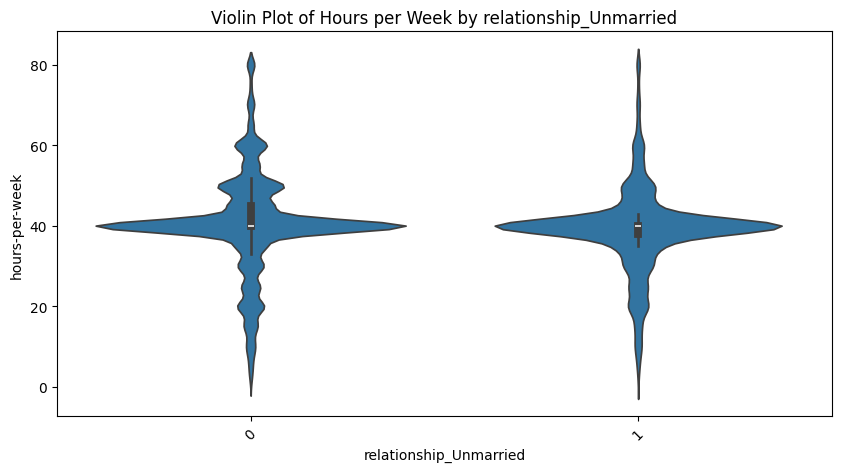

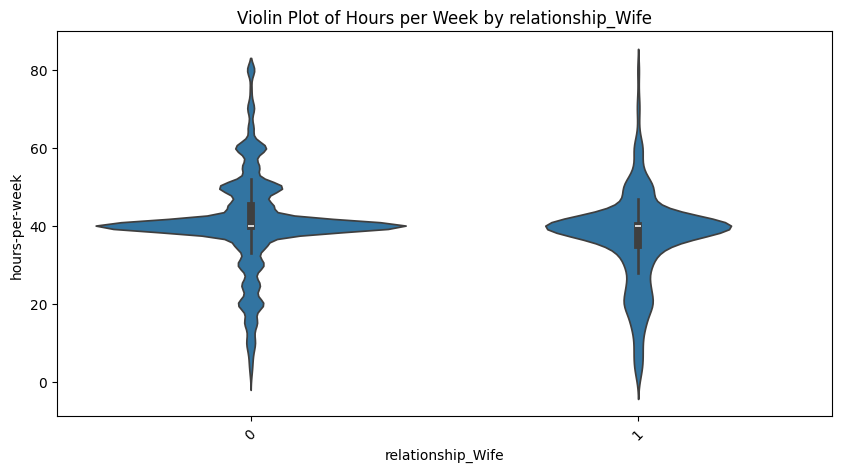

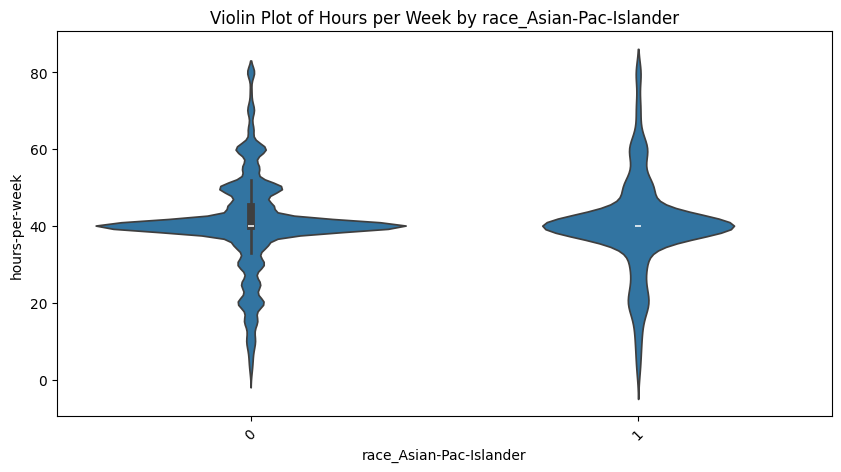

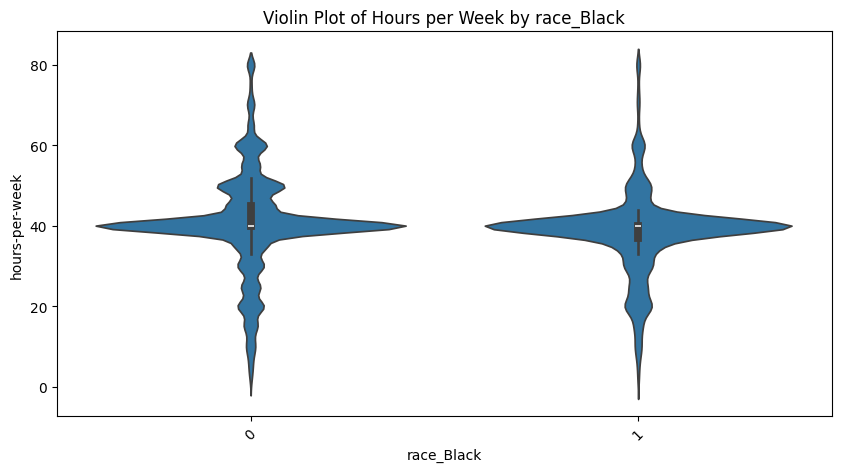

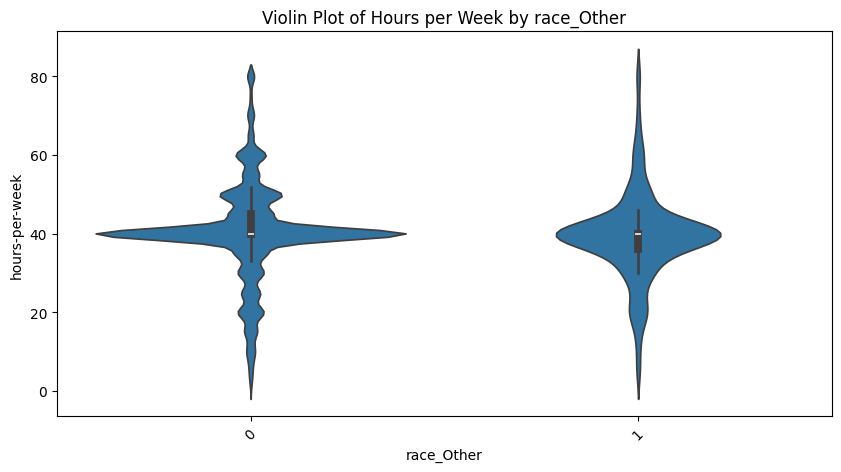

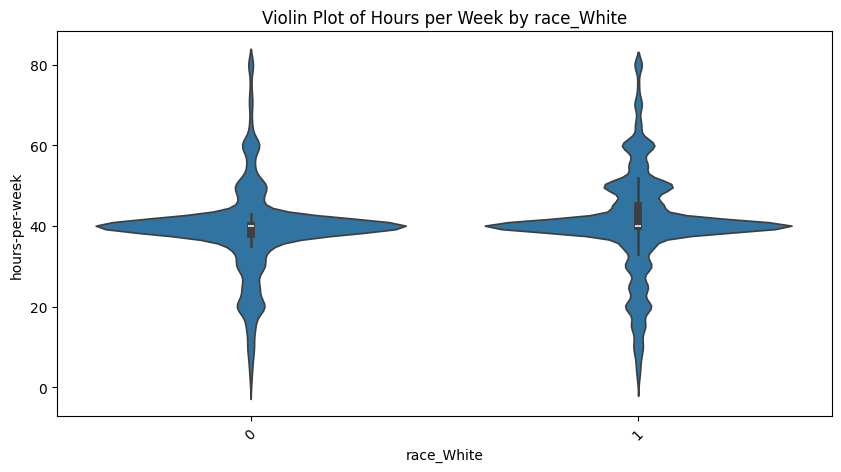

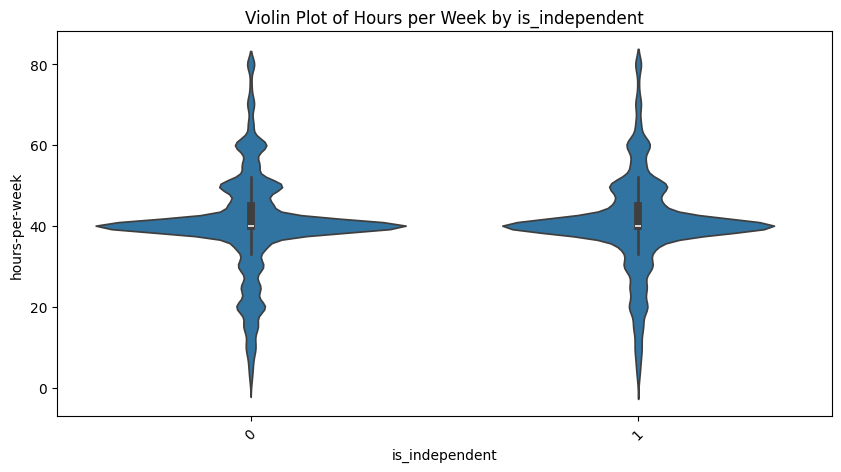

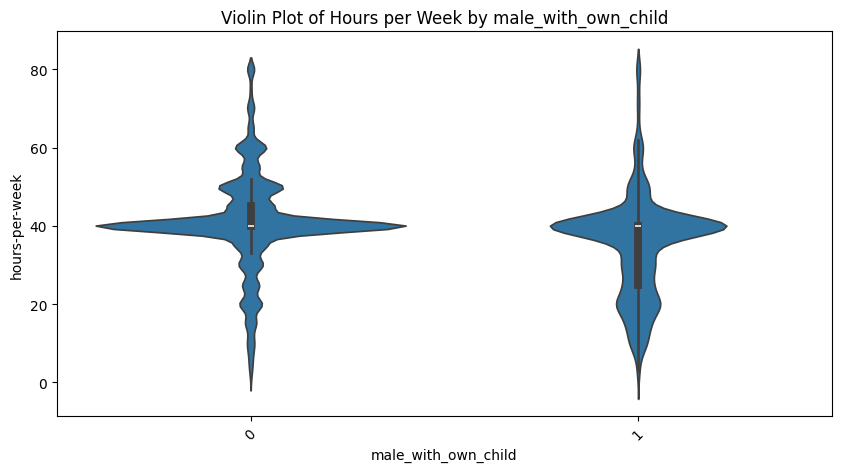

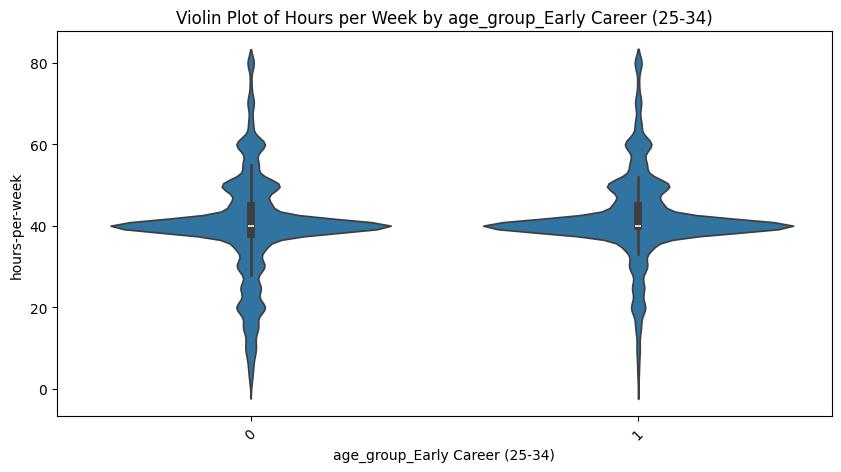

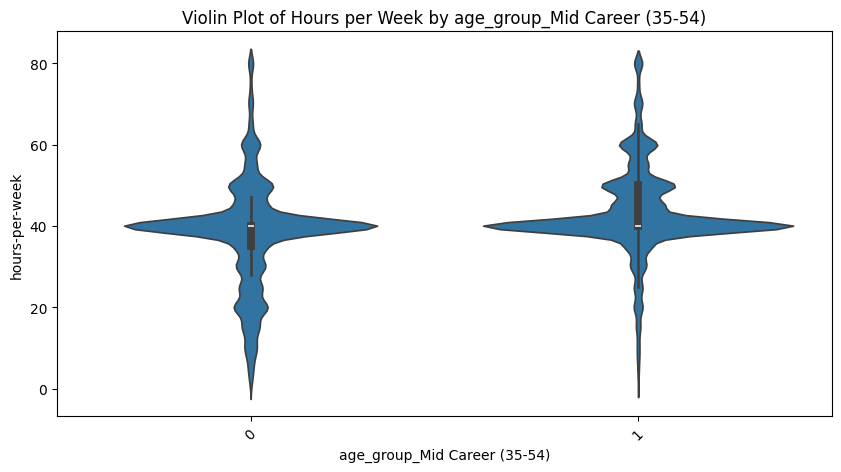

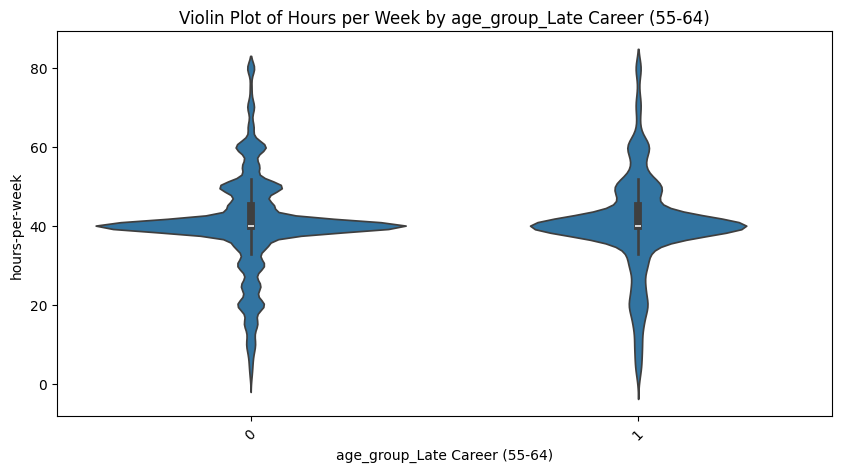

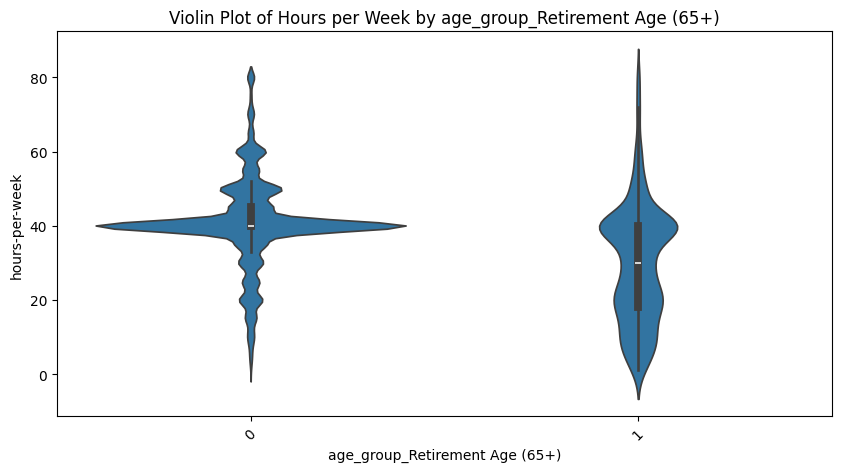

In [107]:
# 9. Violin Plots for Categorical Features vs Hours per Week
for col in binary_cols:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=proc_data[col], y=proc_data['hours-per-week'])
    plt.xticks(rotation=45)
    plt.title(f'Violin Plot of Hours per Week by {col}')
    plt.show()
